In [55]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [56]:
from scipy.optimize import curve_fit
from scipy.special import erf

In [57]:
import os
output_folder = 'fit_plots'
os.makedirs(output_folder, exist_ok=True)

In [58]:
file_name='/content/drive/MyDrive/Monthly_mean_SN_number.txt'
with open(file_name,'r') as f:
  lines=f.readlines()
  data = [line.strip().split() for line in lines if line.strip()]

In [59]:
# In case of Montlhy one
columns=["Year", "Month","year in fraction","SN","Standard Deviation","No fo observations","D"]

# columns=["Year", "Month","Day","year in fraction","SN","Standard Deviation","No fo observations","D"]

In [60]:
df=pd.DataFrame(data, columns=columns)
df

,Year,Month,year in fraction,SN,Standard Deviation,No fo observations,D
0,1749,01,1749.042,96.7,-1.0,-1,None
1,1749,02,1749.123,104.3,-1.0,-1,None
2,1749,03,1749.204,116.7,-1.0,-1,None
3,1749,04,1749.288,92.8,-1.0,-1,None
4,1749,05,1749.371,141.7,-1.0,-1,None
...,...,...,...,...,...,...,...
3309,2024,10,2024.791,166.4,23.9,893,*
3310,2024,11,2024.873,152.5,20.9,681,*
3311,2024,12,2024.958,154.5,25.6,572,*
3312,2025,01,2025.042,137.0,23.3,670,*


In [61]:
df.insert(0, 'date', df['Year'].astype(str) + '-' + df['Month'].astype(str))
# df.insert(0, 'date', df['Year'].astype(str) + '-' + df['Month'].astype(str)+'-'+ df['Day'].astype(str))
df

,date,Year,Month,year in fraction,SN,Standard Deviation,No fo observations,D
0,1749-01,1749,01,1749.042,96.7,-1.0,-1,None
1,1749-02,1749,02,1749.123,104.3,-1.0,-1,None
2,1749-03,1749,03,1749.204,116.7,-1.0,-1,None
3,1749-04,1749,04,1749.288,92.8,-1.0,-1,None
4,1749-05,1749,05,1749.371,141.7,-1.0,-1,None
...,...,...,...,...,...,...,...,...
3309,2024-10,2024,10,2024.791,166.4,23.9,893,*
3310,2024-11,2024,11,2024.873,152.5,20.9,681,*
3311,2024-12,2024,12,2024.958,154.5,25.6,572,*
3312,2025-01,2025,01,2025.042,137.0,23.3,670,*


In [62]:
df['SN']=pd.to_numeric(df['SN'], errors= 'coerce')

In [63]:
df['date'] = pd.to_datetime(df['date'])
df

,date,Year,Month,year in fraction,SN,Standard Deviation,No fo observations,D
0,1749-01-01,1749,01,1749.042,96.7,-1.0,-1,None
1,1749-02-01,1749,02,1749.123,104.3,-1.0,-1,None
2,1749-03-01,1749,03,1749.204,116.7,-1.0,-1,None
3,1749-04-01,1749,04,1749.288,92.8,-1.0,-1,None
4,1749-05-01,1749,05,1749.371,141.7,-1.0,-1,None
...,...,...,...,...,...,...,...,...
3309,2024-10-01,2024,10,2024.791,166.4,23.9,893,*
3310,2024-11-01,2024,11,2024.873,152.5,20.9,681,*
3311,2024-12-01,2024,12,2024.958,154.5,25.6,572,*
3312,2025-01-01,2025,01,2025.042,137.0,23.3,670,*


In [64]:
df = df[df['SN'] >=0]
df

,date,Year,Month,year in fraction,SN,Standard Deviation,No fo observations,D
0,1749-01-01,1749,01,1749.042,96.7,-1.0,-1,None
1,1749-02-01,1749,02,1749.123,104.3,-1.0,-1,None
2,1749-03-01,1749,03,1749.204,116.7,-1.0,-1,None
3,1749-04-01,1749,04,1749.288,92.8,-1.0,-1,None
4,1749-05-01,1749,05,1749.371,141.7,-1.0,-1,None
...,...,...,...,...,...,...,...,...
3309,2024-10-01,2024,10,2024.791,166.4,23.9,893,*
3310,2024-11-01,2024,11,2024.873,152.5,20.9,681,*
3311,2024-12-01,2024,12,2024.958,154.5,25.6,572,*
3312,2025-01-01,2025,01,2025.042,137.0,23.3,670,*


In [65]:
# # Convert to appropriate formats
# df['date'] = pd.to_datetime(df['date'], errors='coerce')
# df['SN'] = pd.to_numeric(df['SN'], errors='coerce')

# # Define the periods
# before_1=df[df['date'] < '1755-02-01']
# cycle1 = df[(df['date'] >= '1755-02-01') & (df['date'] <= '1766-06-01')]
# cycle2_24 = df[(df['date'] > '1766-06-01') & (df['date'] < '2019-12-01')]
# cycle25 = df[df['date'] >= '2019-12-01']

# # Plot
# plt.figure(figsize=(20, 6))
# plt.plot(before_1['date'], before_1['SN'], label=' before Solar Cycle 1', color='skyblue')
# # Plot Cycle 1
# plt.plot(cycle1['date'], cycle1['SN'], label='Solar Cycle 1 (1755–1766)', color='green')

# # Plot Cycles 2–24
# plt.plot(cycle2_24['date'], cycle2_24['SN'], label='Solar Cycles 2–24 (1766–2019)', color='red')

# # Plot Cycle 25
# plt.plot(cycle25['date'], cycle25['SN'], label='Solar Cycle 25 (2019–)', color='royalblue', linestyle='--', linewidth=2)

# # Labels and layout
# plt.xlabel('Year')
# plt.ylabel('Sunspot Number (SN)')
# plt.title('Monthly Sunspot Number', fontsize=14, fontweight='bold')
# plt.legend(loc='upper left')
# plt.grid(True, linestyle='--', alpha=0.5)
# plt.tight_layout()

# # Save and Show
# plt.savefig('Sunspot_Cycles_All.png', dpi=300)
# plt.show()


In [66]:
# import pandas as pd
# import plotly.graph_objs as go
# from plotly.subplots import make_subplots

# # Convert to appropriate formats
# df['date'] = pd.to_datetime(df['date'], errors='coerce')
# df['SN'] = pd.to_numeric(df['SN'], errors='coerce')

# # Define the periods
# before_1 = df[df['date'] < '1755-02-01']
# cycle1 = df[(df['date'] >= '1755-02-01') & (df['date'] <= '1766-06-01')]
# cycle2_24 = df[(df['date'] > '1766-06-01') & (df['date'] < '2019-12-01')]
# cycle25 = df[df['date'] >= '2019-12-01']

# # Create traces
# trace_before_1 = go.Scatter(x=before_1['date'], y=before_1['SN'],
#                             mode='lines', name='Before Solar Cycle 1',
#                             line=dict(color='skyblue'))

# trace_cycle1 = go.Scatter(x=cycle1['date'], y=cycle1['SN'],
#                           mode='lines', name='Solar Cycle 1 (1755–1766)',
#                           line=dict(color='green'))

# trace_cycles_2_24 = go.Scatter(x=cycle2_24['date'], y=cycle2_24['SN'],
#                                mode='lines', name='Solar Cycles 2–24 (1766–2019)',
#                                line=dict(color='red'))

# trace_cycle25 = go.Scatter(x=cycle25['date'], y=cycle25['SN'],
#                            mode='lines', name='Solar Cycle 25 (2019–)',
#                            line=dict(color='royalblue', dash='dash'))

# # Combine all traces into a figure
# fig = go.Figure(data=[trace_before_1, trace_cycle1, trace_cycles_2_24, trace_cycle25])

# # Layout settings
# fig.update_layout(
#     title='Monthly Sunspot Number',
#     xaxis_title='Year',
#     yaxis_title='Sunspot Number (SN)',
#     legend_title='Solar Cycles',
#     template='plotly_white',
#     width=1000,
#     height=500,
#     margin=dict(l=40, r=40, t=60, b=40)
# )

# # Optional: Save as HTML or show
# # fig.write_image("Sunspot_Cycles_All_Plotly.png", scale=3)
# fig.show()


In [67]:
solar_cycles = [
    {"Cycle Number": 1,  "Start Date": "1755-02-01", "End Date": "1766-06-01"},
    {"Cycle Number": 2,  "Start Date": "1766-06-01", "End Date": "1775-06-01"},
    {"Cycle Number": 3,  "Start Date": "1775-06-01", "End Date": "1784-09-01"},
    {"Cycle Number": 4,  "Start Date": "1784-09-01", "End Date": "1798-04-01"},
    {"Cycle Number": 5,  "Start Date": "1798-04-01", "End Date": "1810-08-01"},
    {"Cycle Number": 6,  "Start Date": "1810-08-01", "End Date": "1823-05-01"},
    {"Cycle Number": 7,  "Start Date": "1823-05-01", "End Date": "1833-11-01"},
    {"Cycle Number": 8,  "Start Date": "1833-11-01", "End Date": "1843-07-01"},
    {"Cycle Number": 9,  "Start Date": "1843-07-01", "End Date": "1855-12-01"},
    {"Cycle Number": 10, "Start Date": "1855-12-01", "End Date": "1867-03-01"},
    {"Cycle Number": 11, "Start Date": "1867-03-01", "End Date": "1878-12-01"},
    {"Cycle Number": 12, "Start Date": "1878-12-01", "End Date": "1890-03-01"},
    {"Cycle Number": 13, "Start Date": "1890-03-01", "End Date": "1902-01-01"},
    {"Cycle Number": 14, "Start Date": "1902-01-01", "End Date": "1913-07-01"},
    {"Cycle Number": 15, "Start Date": "1913-07-01", "End Date": "1923-08-01"},
    {"Cycle Number": 16, "Start Date": "1923-08-01", "End Date": "1933-09-01"},
    {"Cycle Number": 17, "Start Date": "1933-09-01", "End Date": "1944-02-01"},
    {"Cycle Number": 18, "Start Date": "1944-02-01", "End Date": "1954-04-01"},
    {"Cycle Number": 19, "Start Date": "1954-04-01", "End Date": "1964-10-01"},
    {"Cycle Number": 20, "Start Date": "1964-10-01", "End Date": "1976-03-01"},
    {"Cycle Number": 21, "Start Date": "1976-03-01", "End Date": "1986-09-01"},
    {"Cycle Number": 22, "Start Date": "1986-09-01", "End Date": "1996-08-01"},
    {"Cycle Number": 23, "Start Date": "1996-08-01", "End Date": "2008-12-01"},
    {"Cycle Number": 24, "Start Date": "2008-12-01", "End Date": "2019-12-01"}
]

In [68]:
for cycle in solar_cycles:
    cycle['Start Date'] = pd.to_datetime(cycle['Start Date'])
    cycle['End Date'] = pd.to_datetime(cycle['End Date'])

In [69]:
start_date='1755-02-01'
end_date='2025-02-01'
filtered_df = df[(df['date'] >= start_date) & (df['date'] <= end_date)]
filtered_df

,date,Year,Month,year in fraction,SN,Standard Deviation,No fo observations,D
73,1755-02-01,1755,02,1755.123,18.7,-1.0,-1,None
74,1755-03-01,1755,03,1755.204,11.3,-1.0,-1,None
75,1755-04-01,1755,04,1755.288,10.8,-1.0,-1,None
76,1755-05-01,1755,05,1755.371,0.0,-1.0,-1,None
77,1755-06-01,1755,06,1755.455,0.0,-1.0,-1,None
...,...,...,...,...,...,...,...,...
3309,2024-10-01,2024,10,2024.791,166.4,23.9,893,*
3310,2024-11-01,2024,11,2024.873,152.5,20.9,681,*
3311,2024-12-01,2024,12,2024.958,154.5,25.6,572,*
3312,2025-01-01,2025,01,2025.042,137.0,23.3,670,*


In [70]:
# result=[]
# for cycle in solar_cycles:
#     start_date = cycle['Start Date']
#     end_date = cycle['End Date']
#     cycle_num = cycle['Cycle Number']

#     filtered_df = df[(df['date'] >= start_date) & (df['date'] <= end_date)].dropna(subset=['SN'])
#     x = (filtered_df['date'] - filtered_df['date'].min()).dt.days.values
#     y = filtered_df['SN'].values

#     def skewed_gauss(x, A, mu, sigma, alpha):
#         t = (x - mu) / sigma
#         return A * np.exp(-0.5 * t**2) * (1 + erf(alpha * t / np.sqrt(2)))

#     p0 = [max(y), np.median(x), np.std(x), 2]  # A, mu, sigma, alpha
#     bounds = ([0, min(x), 0, -10], [np.inf, max(x), np.inf, 10])

#     params, _ = curve_fit(skewed_gauss, x, y, p0=p0, bounds=bounds, maxfev=10000)
#     A, mu, sigma, alpha = params
#     x_fit = np.linspace(min(x), max(x), 10000)
#     y_fit = skewed_gauss(x_fit, A, mu, sigma, alpha)
#     raw_peak_idx = y_fit.idxmax()
#     raw_peak_value = x_fit.loc[raw_peak_idx, 'SN']
#     raw_peak_date = x_fit[raw_peak_idx, 'date']

#     rise_time_days = (raw_peak_date - start_date).days
#     decay_time_days = (end_date - raw_peak_date).days
#     total_duration_days = (end_date - start_date).days

#     rise_time_years = rise_time_days / 365.25
#     decay_time_years = decay_time_days / 365.25
#     total_duration_years = total_duration_days / 365


#     result.append({
#         'Cycle Number': cycle_num,
#         'Total duration': total_duration_years,
#         # 'Raw Peak Sunspot Number': raw_peak_value,
#         # 'Raw Peak Date': raw_peak_date.strftime('%Y-%m-%d'),
#         'Rise Time (years)': rise_time_years,
#         'Decay Time (years)': decay_time_years,
#         })

# df_result = pd.DataFrame(result)
# df_result

In [71]:
import numpy as np
import pandas as pd
from scipy.optimize import curve_fit
from scipy.special import erf

result = []

for cycle in solar_cycles:
    start_date = cycle['Start Date']
    end_date = cycle['End Date']
    cycle_num = cycle['Cycle Number']

    filtered_df = df[(df['date'] >= start_date) & (df['date'] <= end_date)].dropna(subset=['SN'])
    x = (filtered_df['date'] - filtered_df['date'].min()).dt.days.values
    y = filtered_df['SN'].values

    def skewed_gauss(x, A, mu, sigma, alpha):
        t = (x - mu) / sigma
        return A * np.exp(-0.5 * t**2) * (1 + erf(alpha * t / np.sqrt(2)))

    p0 = [max(y), np.median(x), np.std(x), 2]  # A, mu, sigma, alpha
    bounds = ([0, min(x), 0, -10], [np.inf, max(x), np.inf, 10])

    params, _ = curve_fit(skewed_gauss, x, y, p0=p0, bounds=bounds, maxfev=10000)
    A, mu, sigma, alpha = params

    x_fit = np.linspace(min(x), max(x), 10000)
    y_fit = skewed_gauss(x_fit, A, mu, sigma, alpha)

    raw_peak_idx = np.argmax(y_fit)
    raw_peak_day = x_fit[raw_peak_idx]
    raw_peak_value = y_fit[raw_peak_idx]
    raw_peak_date = filtered_df['date'].min() + pd.to_timedelta(raw_peak_day, unit='D')

    rise_time_days = (raw_peak_date - start_date).days
    decay_time_days = (end_date - raw_peak_date).days
    total_duration_days = (end_date - start_date).days

    rise_time_years = rise_time_days / 365.25
    decay_time_years = decay_time_days / 365.25
    total_duration_years = total_duration_days / 365.25

    result.append({
        'Cycle Number': cycle_num,
        'Total duration (years)': total_duration_years,
        'Rise Time (years)': rise_time_years,
        'Decay Time (years)': decay_time_years,
        # 'Raw Peak Sunspot Number': raw_peak_value,
        # 'Raw Peak Date': raw_peak_date.strftime('%Y-%m-%d'),
    })

df_result = pd.DataFrame(result)
df_result

,Cycle Number,Total duration (years),Rise Time (years),Decay Time (years)
0,1,11.329227,6.072553,5.253936
1,2,8.999316,3.635866,5.360712
2,3,9.253936,2.954141,6.297057
3,4,13.579740,3.197810,10.379192
4,5,12.331280,5.585216,6.743326
5,6,12.747433,6.102669,6.642026
6,7,10.505133,6.277892,4.224504
7,8,9.661875,3.189596,6.469541
8,9,12.418891,5.127995,7.288159
9,10,11.247091,4.046543,7.197810


In [72]:
import os

output_folder = 'fit_plots'
os.makedirs(output_folder, exist_ok=True)

Cycle 1: 0 outliers

Cycle 1 Fitted Parameters:
A = 109.03, mu = 1782.06, sigma = 1098.24, alpha = 0.61
Maximum of skew fitted 120.06799942040807


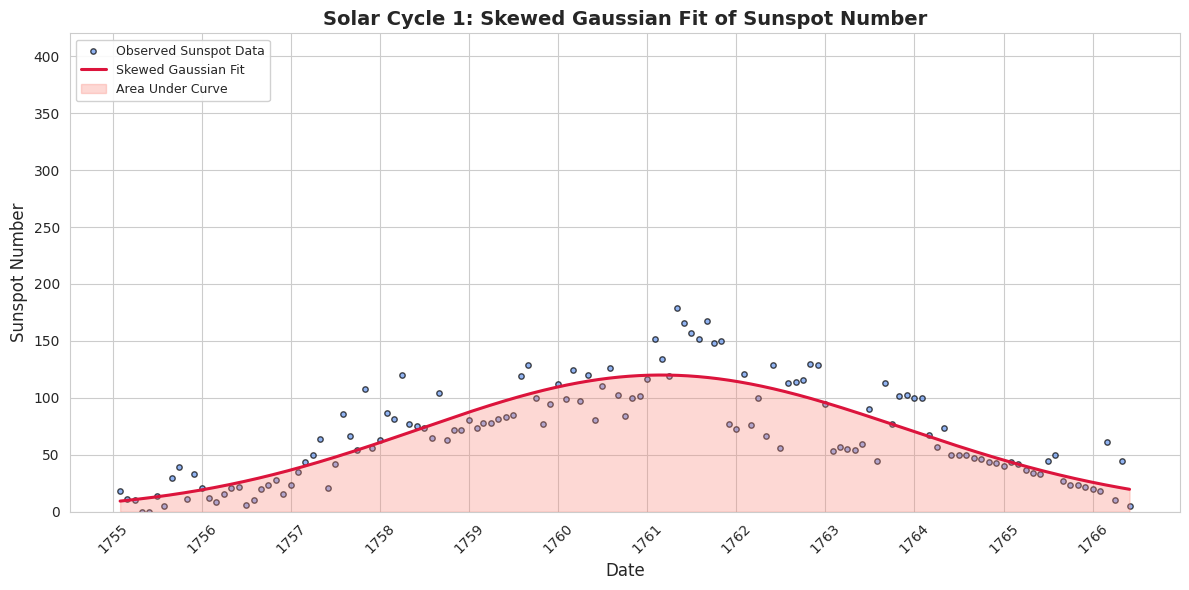

Cycle 2: 0 outliers

Cycle 2 Fitted Parameters:
A = 113.29, mu = 720.12, sigma = 1197.13, alpha = 2.43
Maximum of skew fitted 177.58156502117092


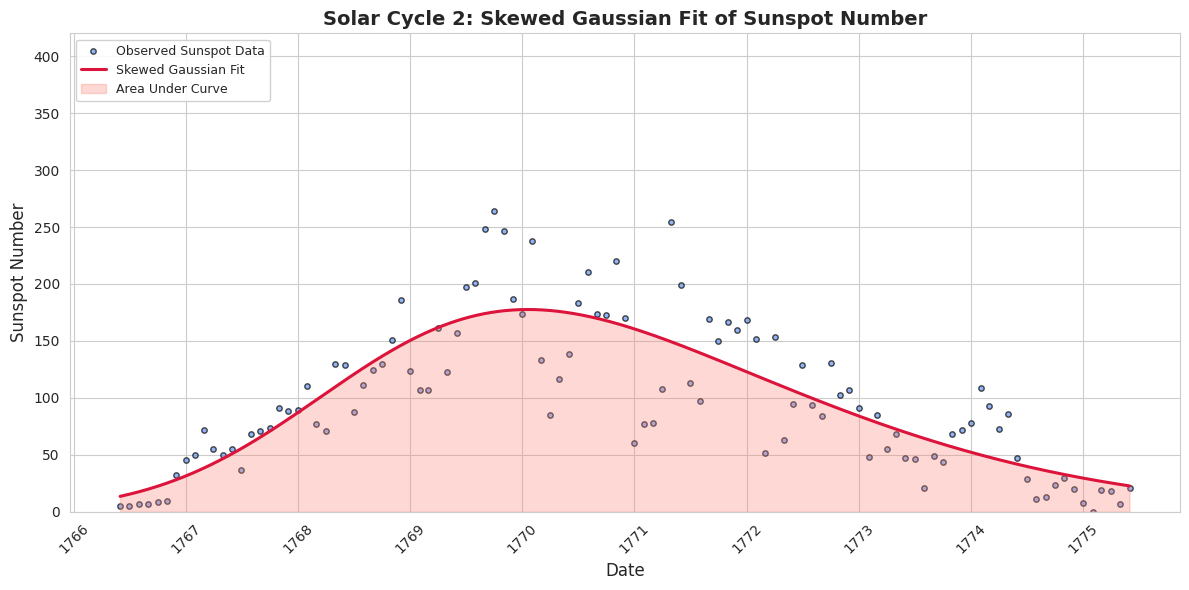

Cycle 3: 1 outliers

Cycle 3 Fitted Parameters:
A = 138.61, mu = 702.15, sigma = 1074.93, alpha = 5.49
Maximum of skew fitted 253.61029992377067


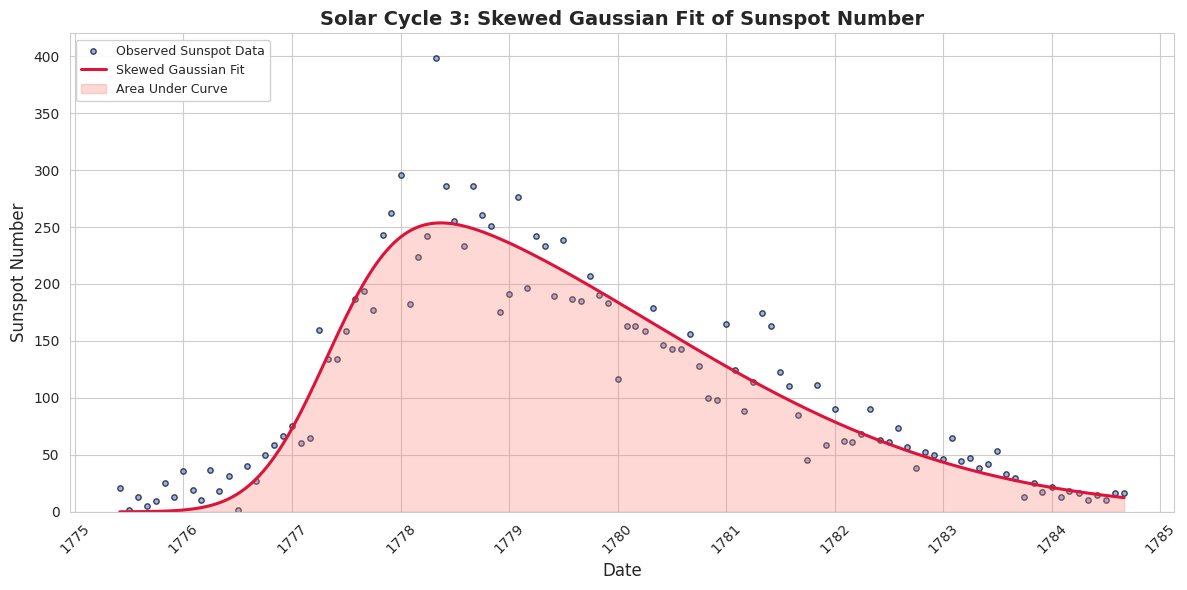

Cycle 4: 0 outliers

Cycle 4 Fitted Parameters:
A = 120.93, mu = 593.70, sigma = 1695.06, alpha = 5.82
Maximum of skew fitted 222.8365091488972


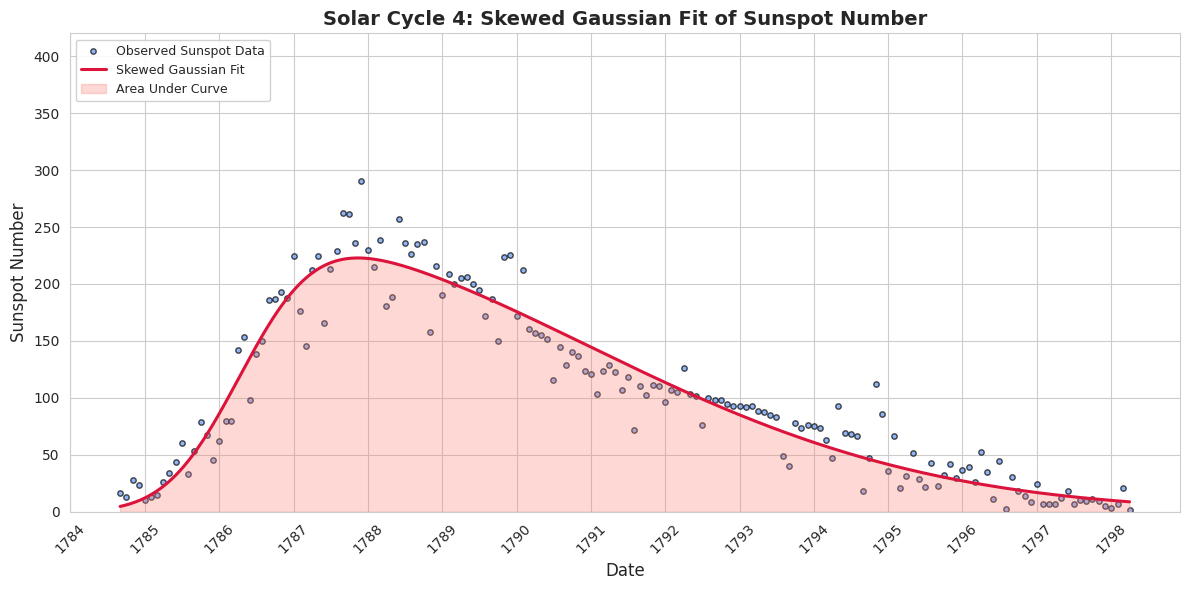

Cycle 5: 0 outliers

Cycle 5 Fitted Parameters:
A = 82.90, mu = 2108.80, sigma = 848.76, alpha = -0.10
Maximum of skew fitted 83.17749560765108


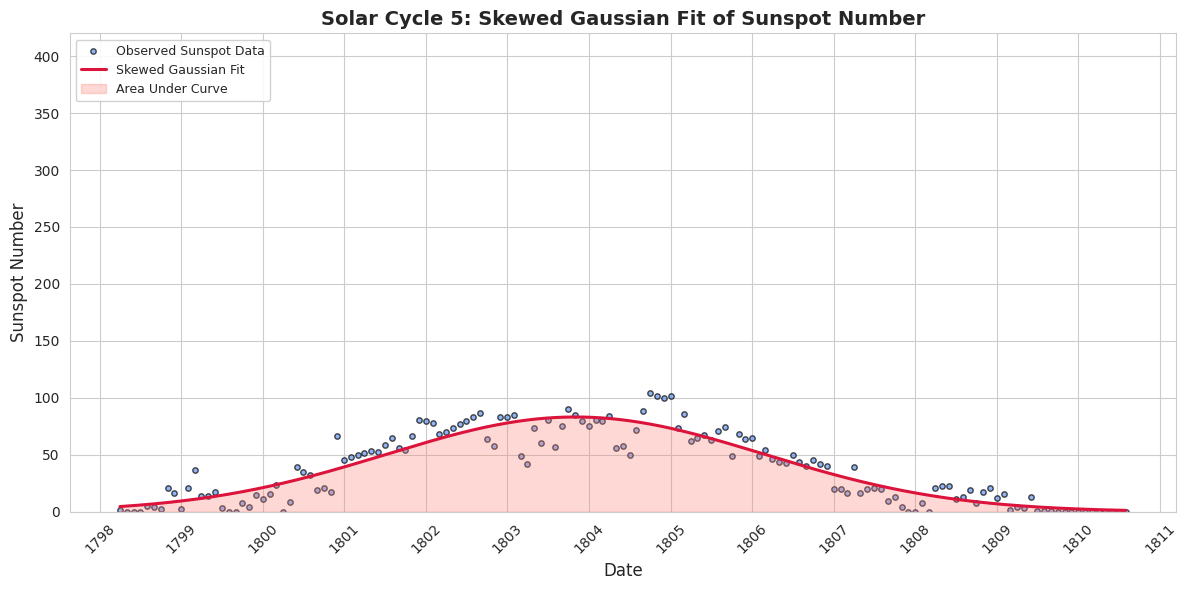

Cycle 6: 3 outliers

Cycle 6 Fitted Parameters:
A = 48.45, mu = 1626.30, sigma = 1163.40, alpha = 2.24
Maximum of skew fitted 74.27308690741683


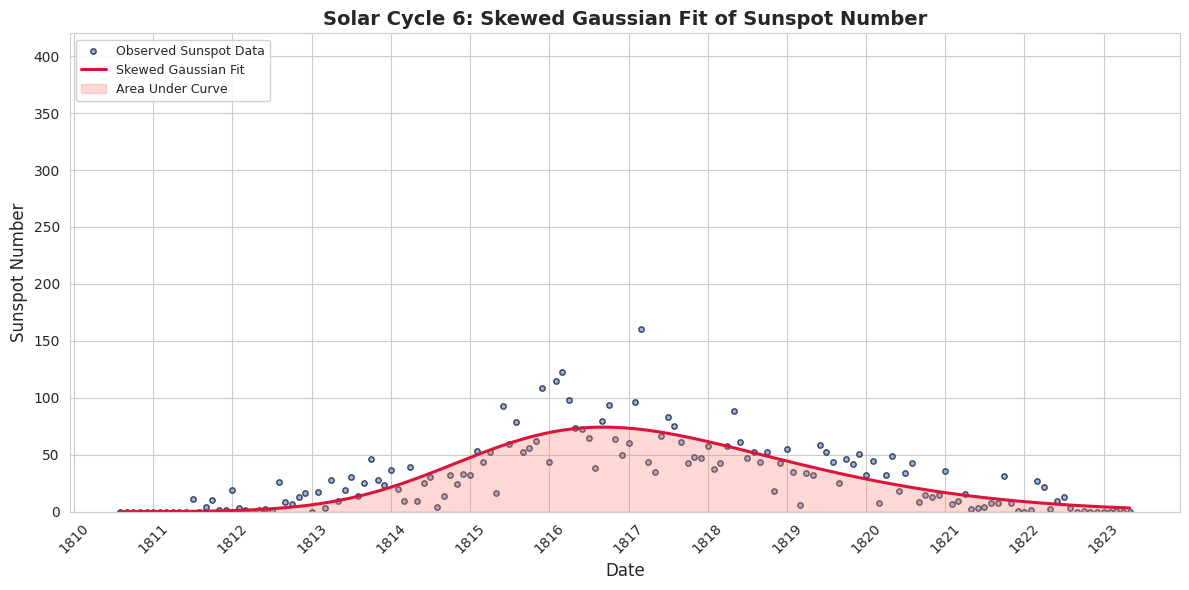

Cycle 7: 0 outliers

Cycle 7 Fitted Parameters:
A = 84.95, mu = 2929.70, sigma = 1177.13, alpha = -1.74
Maximum of skew fitted 121.34171850537632


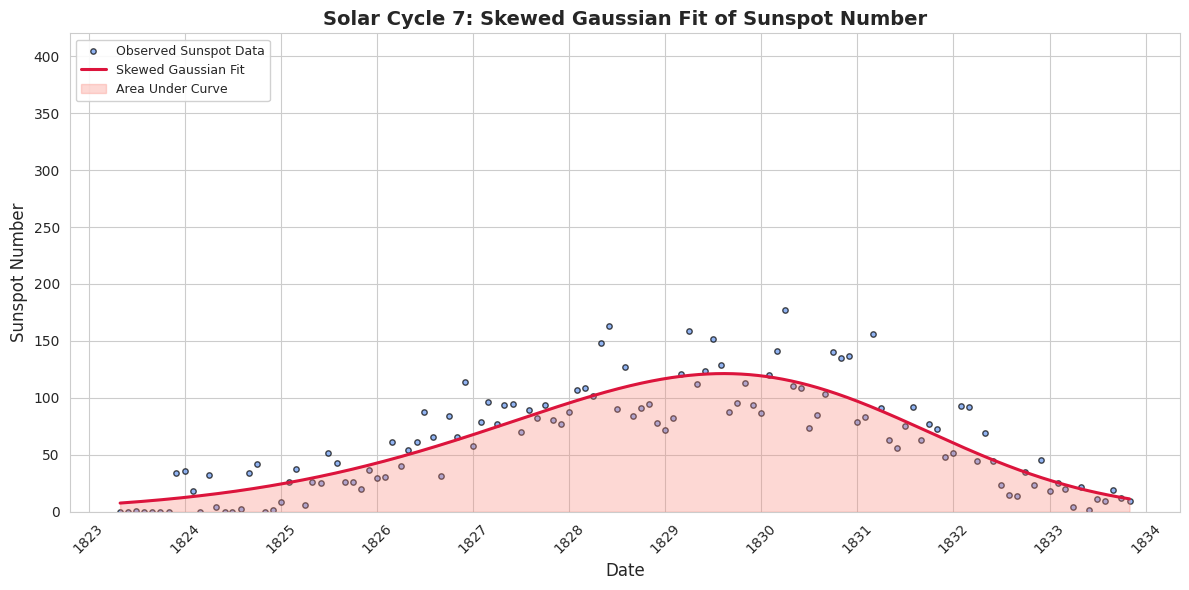

Cycle 8: 0 outliers

Cycle 8 Fitted Parameters:
A = 128.44, mu = 681.18, sigma = 1252.81, alpha = 4.64
Maximum of skew fitted 229.6848917225677


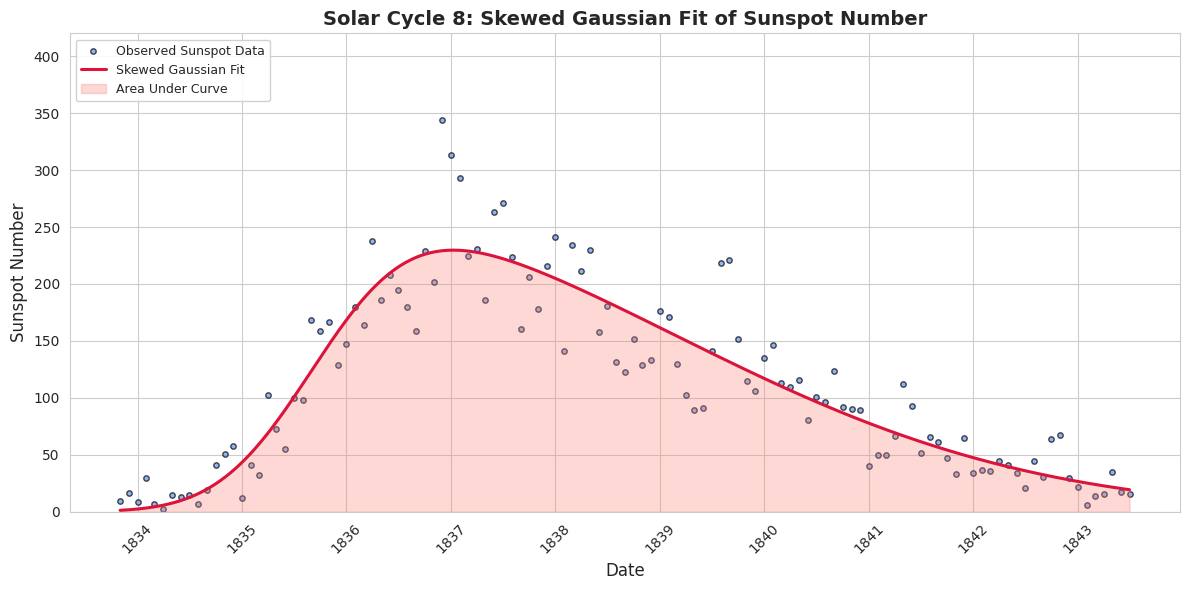

Cycle 9: 2 outliers

Cycle 9 Fitted Parameters:
A = 120.34, mu = 1123.00, sigma = 1523.43, alpha = 2.68
Maximum of skew fitted 193.34029949603445


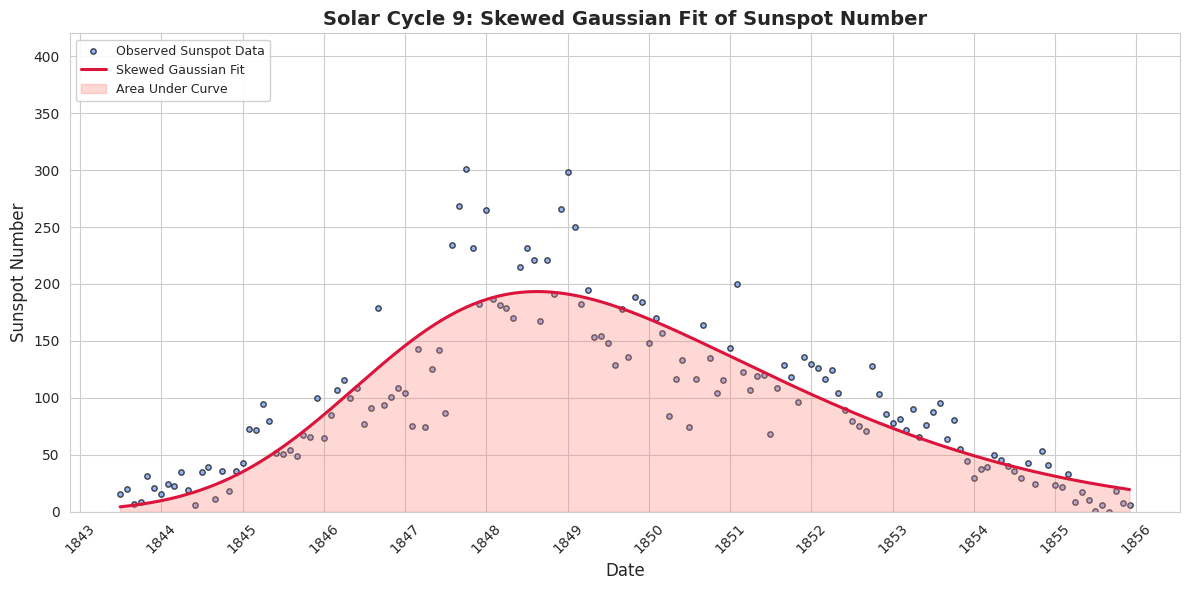

Cycle 10: 0 outliers

Cycle 10 Fitted Parameters:
A = 100.29, mu = 870.50, sigma = 1561.36, alpha = 4.57
Maximum of skew fitted 178.93309179585242


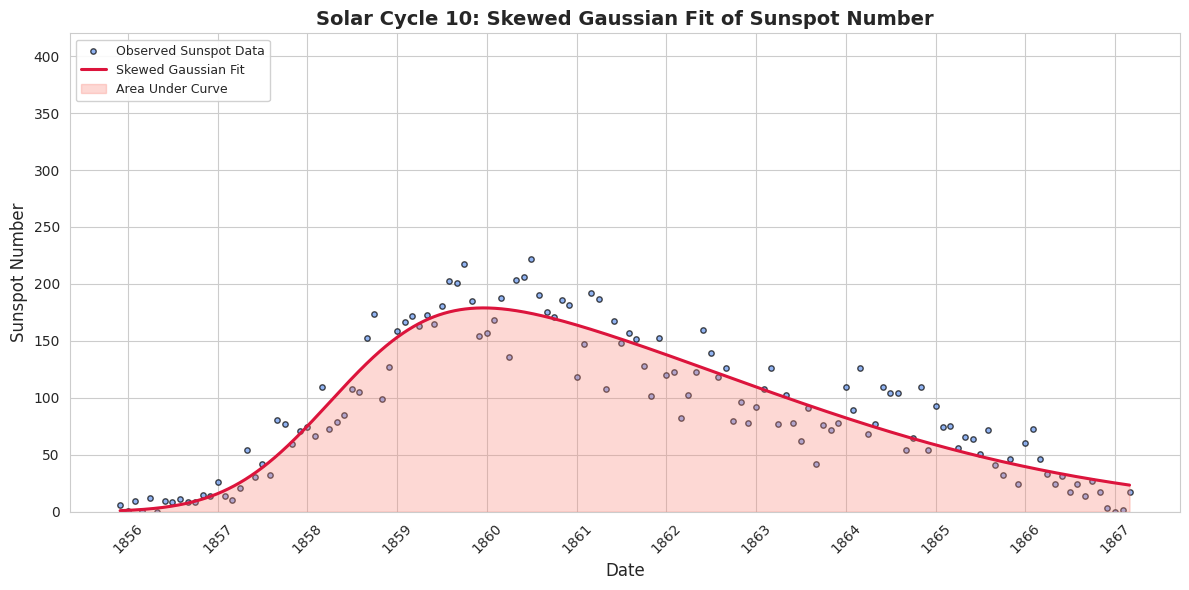

Cycle 11: 0 outliers

Cycle 11 Fitted Parameters:
A = 133.20, mu = 798.84, sigma = 1135.52, alpha = 2.86
Maximum of skew fitted 217.2989003619734


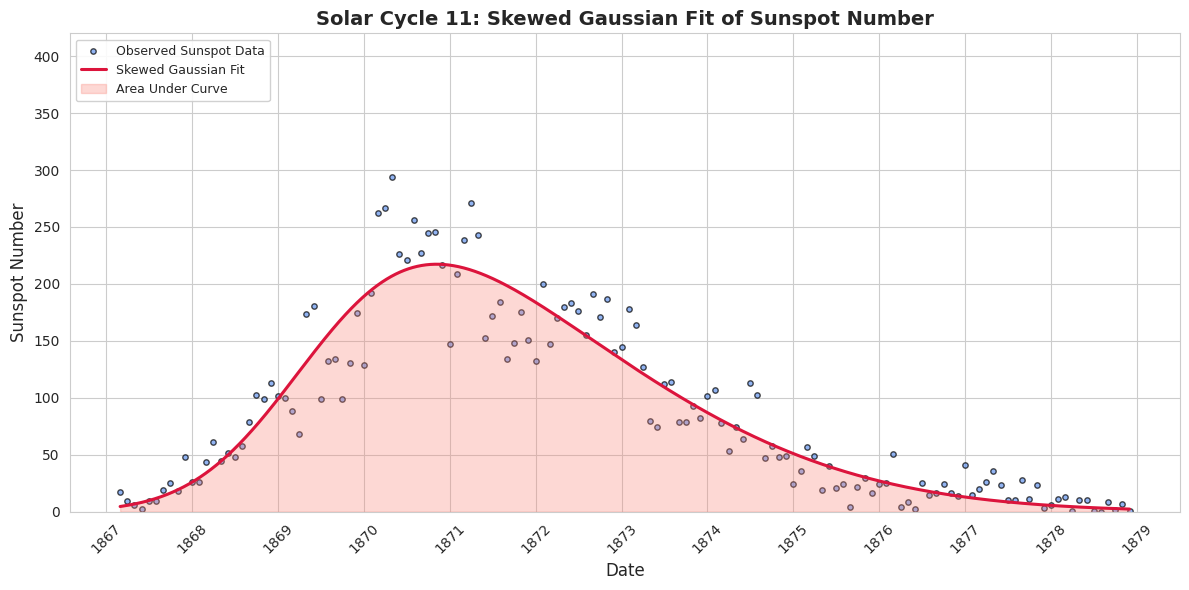

Cycle 12: 0 outliers

Cycle 12 Fitted Parameters:
A = 99.34, mu = 1177.84, sigma = 959.53, alpha = 0.84
Maximum of skew fitted 116.31972474303191


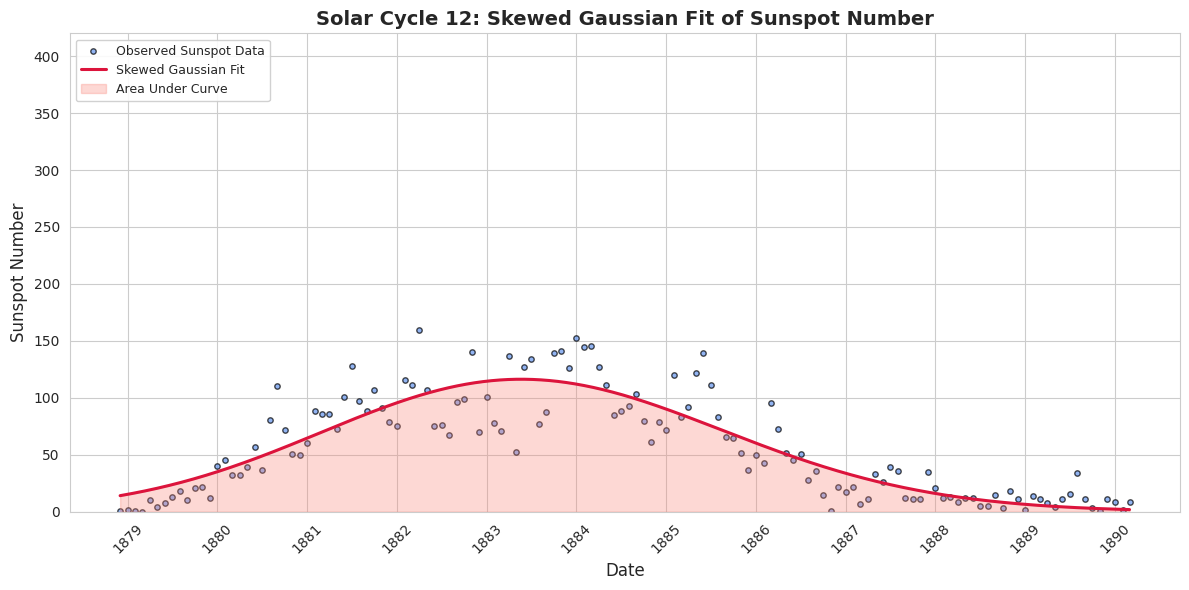

Cycle 13: 0 outliers

Cycle 13 Fitted Parameters:
A = 82.64, mu = 598.89, sigma = 1367.11, alpha = 3.84
Maximum of skew fitted 143.22887889423563


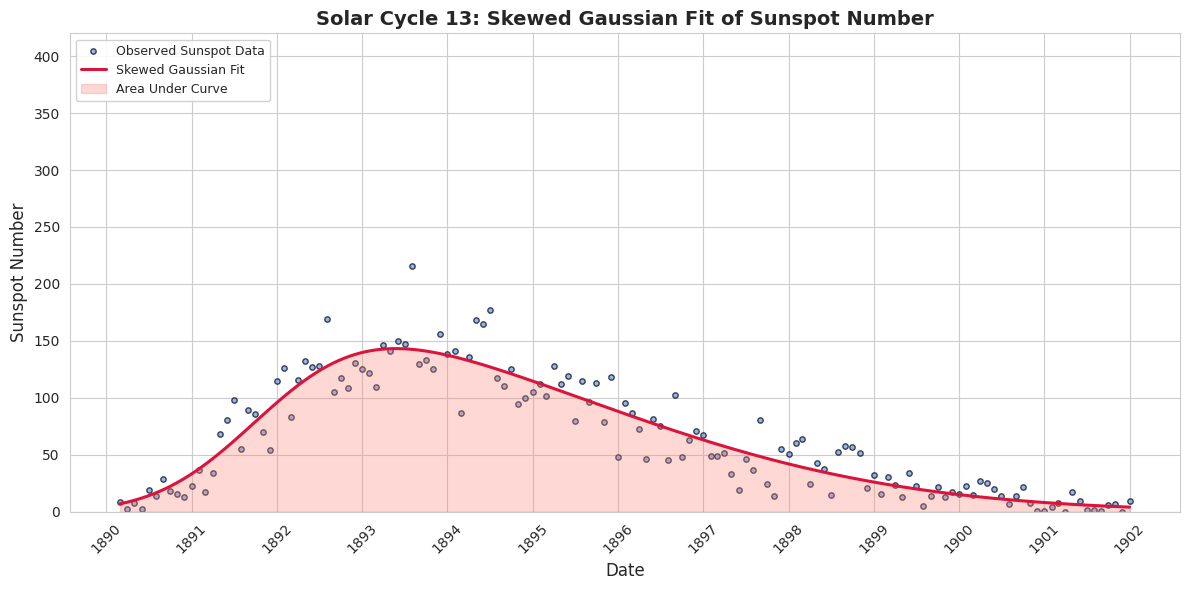

Cycle 14: 0 outliers

Cycle 14 Fitted Parameters:
A = 107.33, mu = 1756.95, sigma = 875.41, alpha = 0.00
Maximum of skew fitted 107.33456320857559


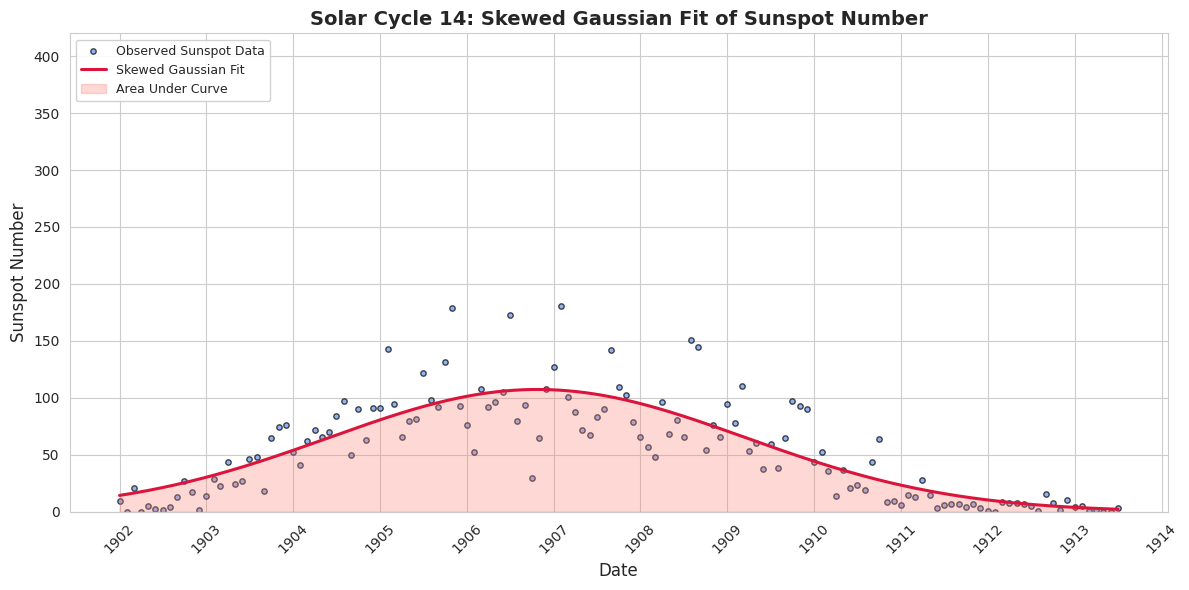

Cycle 15: 1 outliers

Cycle 15 Fitted Parameters:
A = 107.58, mu = 1015.25, sigma = 1013.29, alpha = 1.72
Maximum of skew fitted 153.15684137805908


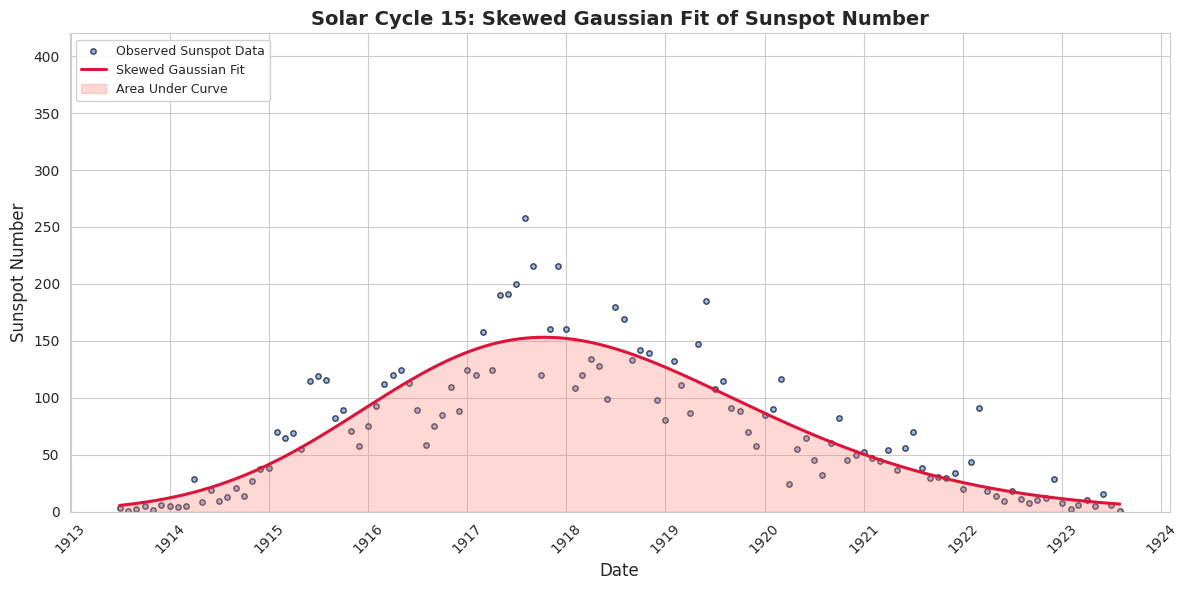

Cycle 16: 0 outliers

Cycle 16 Fitted Parameters:
A = 95.26, mu = 931.40, sigma = 1085.73, alpha = 1.52
Maximum of skew fitted 130.75723023141174


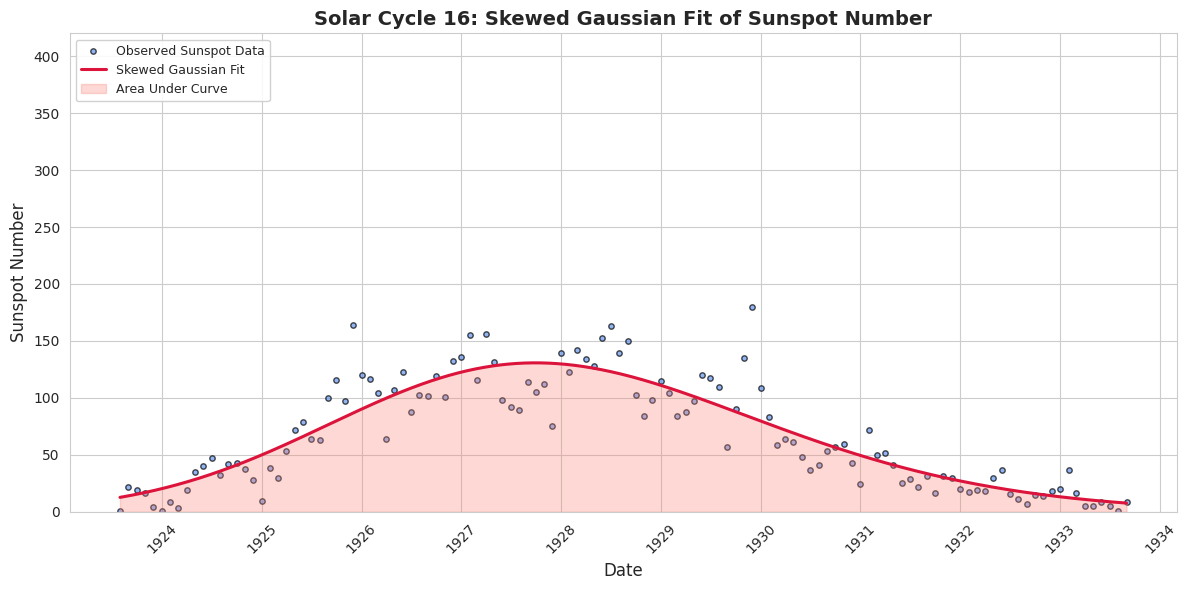

Cycle 17: 0 outliers

Cycle 17 Fitted Parameters:
A = 112.71, mu = 902.37, sigma = 1331.71, alpha = 3.56
Maximum of skew fitted 192.58414263011952


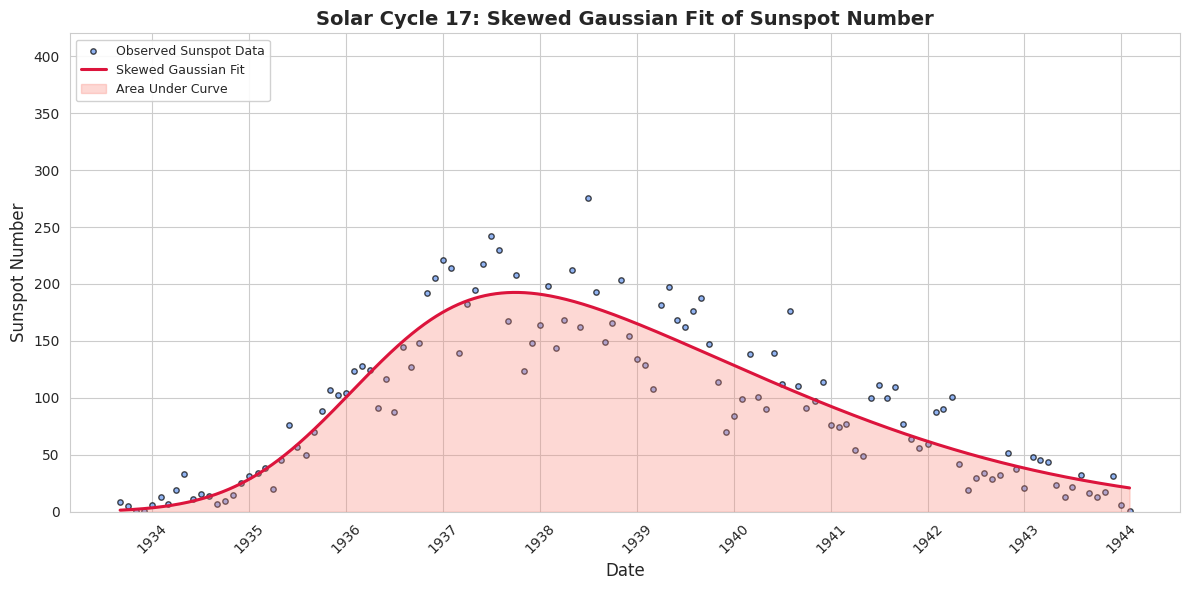

Cycle 18: 0 outliers

Cycle 18 Fitted Parameters:
A = 135.15, mu = 815.15, sigma = 1225.75, alpha = 2.92
Maximum of skew fitted 221.50813611350625


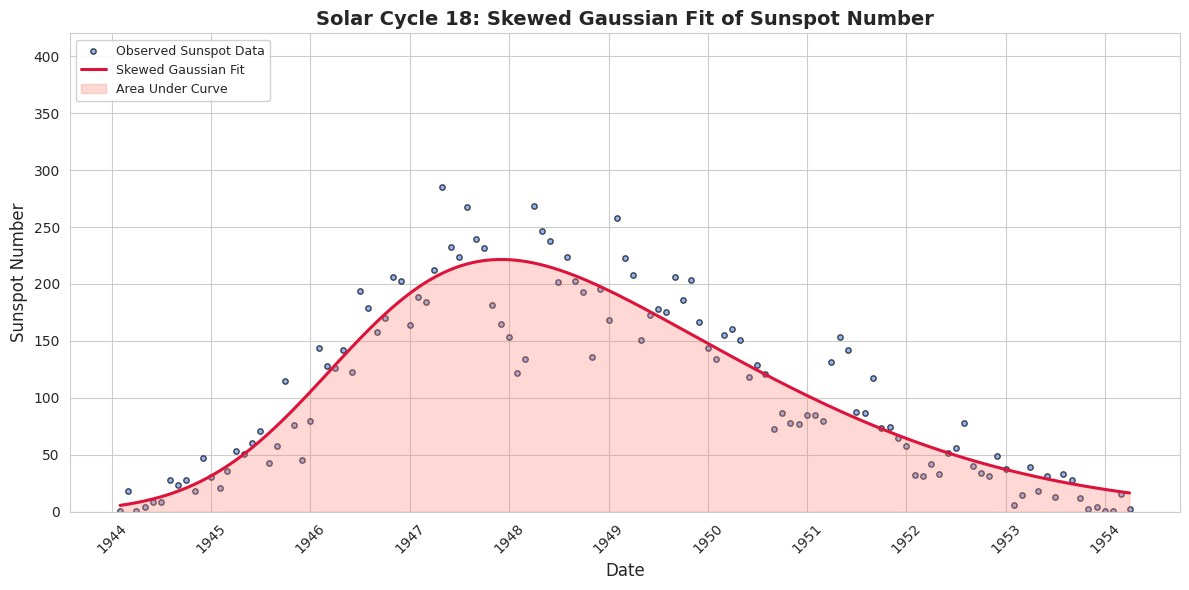

Cycle 19: 0 outliers

Cycle 19 Fitted Parameters:
A = 173.05, mu = 776.84, sigma = 1153.13, alpha = 3.22
Maximum of skew fitted 289.8268060837124


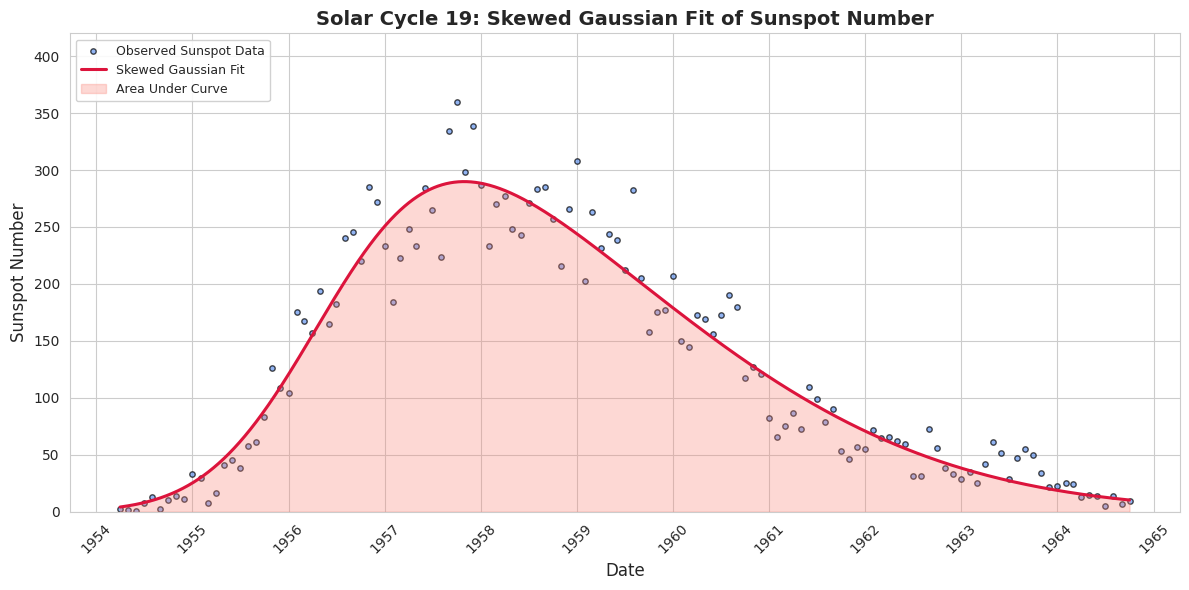

Cycle 20: 0 outliers

Cycle 20 Fitted Parameters:
A = 93.37, mu = 769.05, sigma = 1614.11, alpha = 3.58
Maximum of skew fitted 159.75390949884027


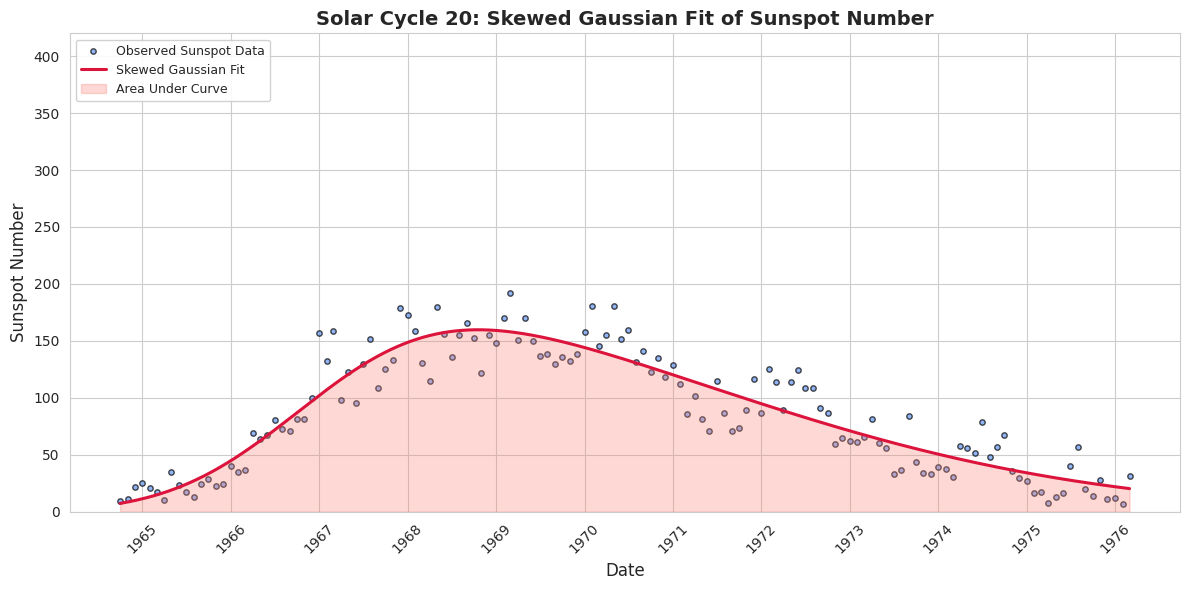

Cycle 21: 0 outliers

Cycle 21 Fitted Parameters:
A = 151.27, mu = 932.85, sigma = 1148.07, alpha = 2.36
Maximum of skew fitted 235.28938470087374


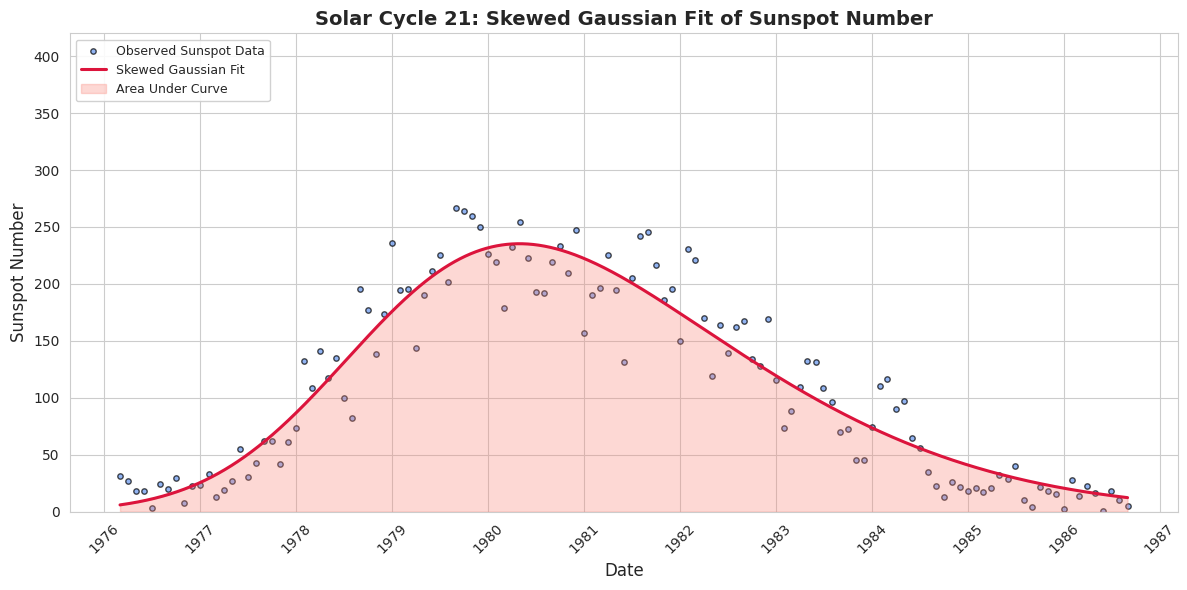

Cycle 22: 0 outliers

Cycle 22 Fitted Parameters:
A = 136.78, mu = 713.83, sigma = 1145.00, alpha = 2.92
Maximum of skew fitted 224.25455003795295


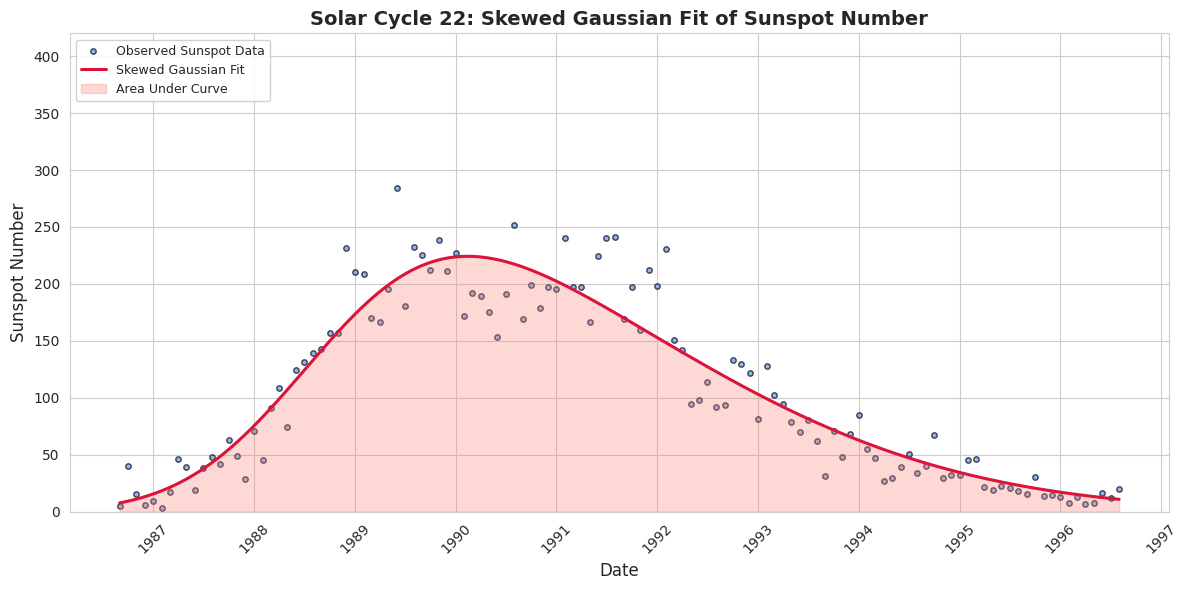

Cycle 23: 0 outliers

Cycle 23 Fitted Parameters:
A = 179.73, mu = 1712.26, sigma = 829.15, alpha = 0.00
Maximum of skew fitted 179.73349193722632


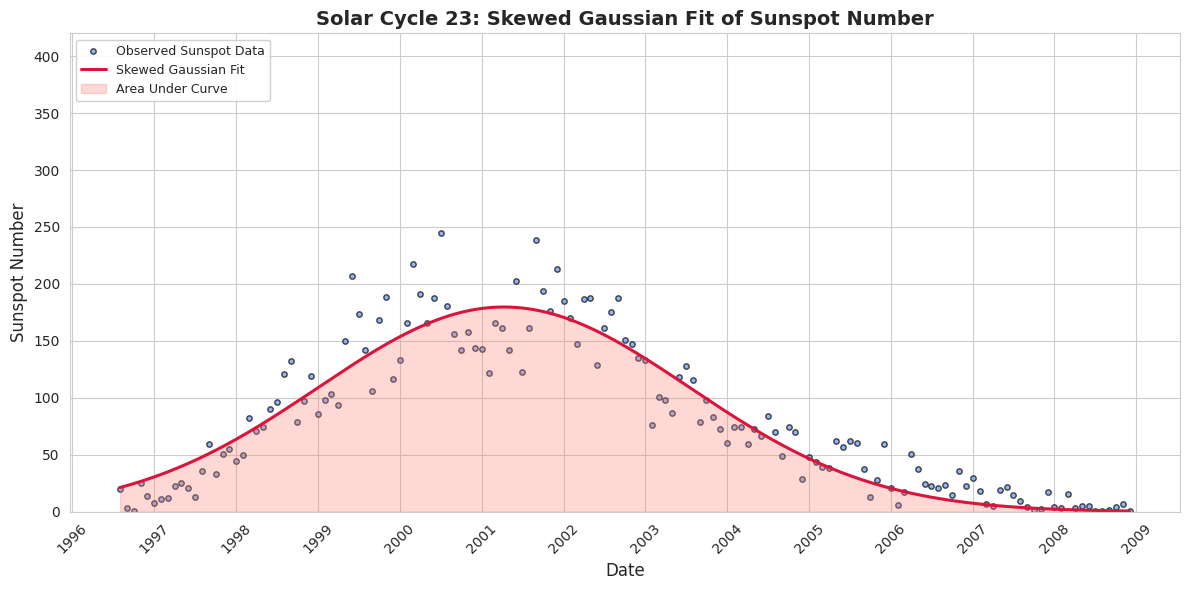

Cycle 24: 0 outliers

Cycle 24 Fitted Parameters:
A = 108.49, mu = 1731.25, sigma = 745.59, alpha = 0.00
Maximum of skew fitted 108.48701393529994


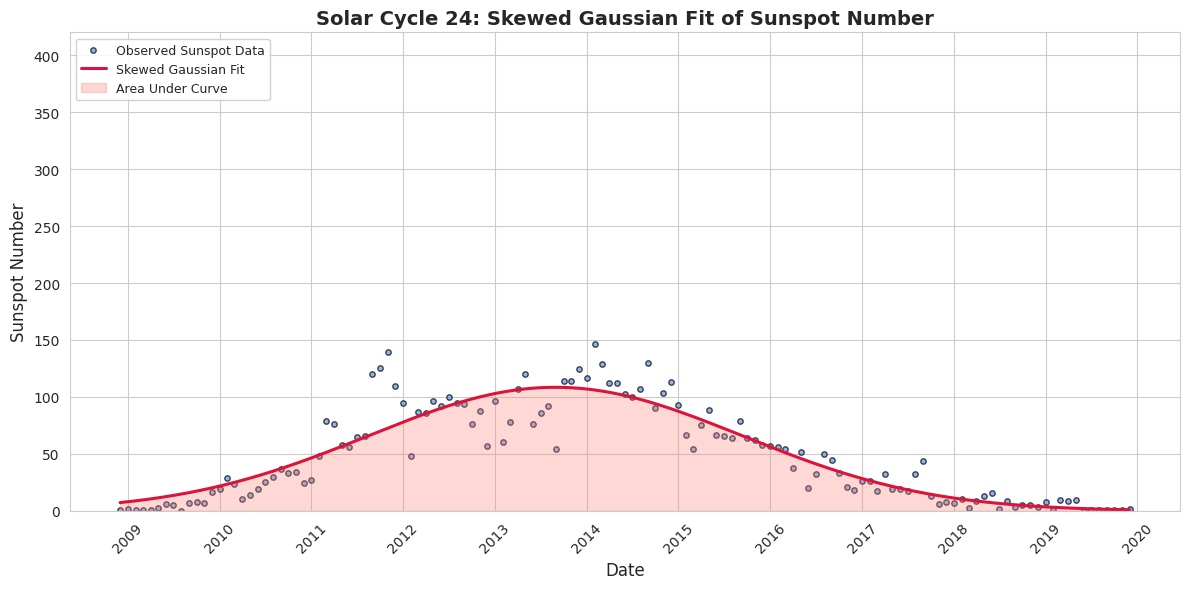

In [73]:
from scipy.optimize import curve_fit
from scipy.special import erf
from numpy import trapz
from scipy.integrate import simpson
from scipy.stats import skew, kurtosis
import matplotlib.dates as mdates
import seaborn as sns

results = []
for cycle in solar_cycles:
    start_date = cycle['Start Date']
    end_date = cycle['End Date']
    cycle_num = cycle['Cycle Number']

    def skewed_gauss(x, A, mu, sigma, alpha):
        t = (x - mu) / sigma
        return A * np.exp(-0.5 * t**2) * (1 + erf(alpha * t / np.sqrt(2)))

    # Filter sunspot data for current cycle
    # filtered_df = filtered_df.dropna(subset=['SN'])
    filtered_df = df[(df['date'] >= start_date) & (df['date'] <= end_date)].dropna(subset=['SN'])
    x = (filtered_df['date'] - filtered_df['date'].min()).dt.days.values
    y = filtered_df['SN'].values
    mean_sn=np.mean(y)

    # Calculate IQR for sunspot numbers
    q1 = filtered_df['SN'].quantile(0.25)
    q3 = filtered_df['SN'].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    outliers_df = filtered_df[(filtered_df['SN'] < lower_bound) | (filtered_df['SN'] > upper_bound)]
    print(f"Cycle {cycle_num}: {len(outliers_df)} outliers")


    raw_peak_idx = filtered_df['SN'].idxmax()
    raw_peak_value = filtered_df.loc[raw_peak_idx, 'SN']
    raw_peak_date = filtered_df.loc[raw_peak_idx, 'date']

    rise_time_days = (raw_peak_date - start_date).days
    decay_time_days = (end_date - raw_peak_date).days

    rise_time_years = rise_time_days / 365.25
    decay_time_years = decay_time_days / 365.25

    p0 = [max(y), np.median(x), np.std(x), 2]  # A, mu, sigma, alpha
    bounds = ([0, min(x), 0, -10], [np.inf, max(x), np.inf, 10])

    try:
        params, _ = curve_fit(skewed_gauss, x, y, p0=p0, bounds=bounds, maxfev=10000)
        A, mu, sigma, alpha = params

        x_fit = np.linspace(min(x), max(x), 10000)
        y_fit = skewed_gauss(x_fit, A, mu, sigma, alpha)
        dx = x_fit[1] - x_fit[0]

        cum_area = np.cumsum(y_fit) * dx
        total_area = cum_area[-1]
        cum_area_norm = cum_area / total_area

        skewness = skew(y)
        kurt = kurtosis(y)

        def find_bounds(cum_area, x_fit, level):
            lower_idx = np.argmax(cum_area >= (1 - level) / 2)
            upper_idx = np.argmax(cum_area >= 1 - (1 - level) / 2)
            return x_fit[lower_idx], x_fit[upper_idx]

        x_lower_1sigma, x_upper_1sigma = find_bounds(cum_area_norm, x_fit, 0.6827)
        x_lower_2sigma, x_upper_2sigma = find_bounds(cum_area_norm, x_fit, 0.9545)

        start_ref = filtered_df['date'].min()
        mu_date = start_ref + pd.to_timedelta(mu, unit='D')
        date_lower_1 = start_ref + pd.to_timedelta(x_lower_1sigma, unit='D')
        date_upper_1 = start_ref + pd.to_timedelta(x_upper_1sigma, unit='D')
        date_lower_2 = start_ref + pd.to_timedelta(x_lower_2sigma, unit='D')
        date_upper_2 = start_ref + pd.to_timedelta(x_upper_2sigma, unit='D')

        width_1sigma = x_upper_1sigma - x_lower_1sigma
        width_2sigma = x_upper_2sigma - x_lower_2sigma
        width_1sigma_years = width_1sigma / 365.25
        width_2sigma_years = width_2sigma / 365.25


        area_simpson = simpson(y_fit, x=x_fit)
        # area_trapz = trapz(y_fit, x_fit)

        print(f"\nCycle {cycle_num} Fitted Parameters:")
        print(f"A = {A:.2f}, mu = {mu:.2f}, sigma = {sigma:.2f}, alpha = {alpha:.2f}")
        print("Maximum of skew fitted", max(y_fit))

        results.append({
        'Cycle Number': cycle_num,
        'Skewness (Data)': skewness,
        'Excess Kurtosis (Data)': kurt,
        'Total Area (Simpson)': area_simpson,
        '1σ Width (years)': width_1sigma_years,
        '2σ Width (years)': width_2sigma_years,
        'Mean Sunspot Number ':mean_sn,
        'Skew fitted maximum': round(max(y_fit), 2),
        'Max* 2-sigma': round(width_2sigma_years * max(y_fit), 2)
        # 'Raw Peak Sunspot Number': raw_peak_value,
        # 'Raw Peak Date': raw_peak_date.strftime('%Y-%m-%d'),
        # 'Rise Time (years)': rise_time_years,
        # 'Decay Time (years)': decay_time_years,
        })



        # ymin, ymax = plt.ylim()
        # ymin, ymax = plt.ylim()
        # y1 = ymin + 0.4 * (ymax - ymin)
        # y2 = ymin + 0.6 * (ymax - ymin)
        # x_middle_1sigma = date_lower_1 + (date_upper_1 - date_lower_1) / 2
        # plt.annotate('', xy=(date_lower_1, y1), xytext=(date_upper_1, y1),
        #      arrowprops=dict(arrowstyle='<->', color='green', lw=2))
        # plt.text(x_middle_1sigma, y1 - 0.03 * (ymax - ymin), '1σ Interval', color='green', ha='center')

        # x_middle_2sigma = date_lower_2 + (date_upper_2 - date_lower_2) / 2
        # plt.annotate('', xy=(date_lower_2, y2), xytext=(date_upper_2, y2),
        #      arrowprops=dict(arrowstyle='<->', color='purple', lw=2))
        # plt.text(x_middle_2sigma, y2 - 0.03 * (ymax - ymin), '2σ Interval', color='purple', ha='center')


        # plt.figure(figsize=(10, 5))
        # plt.scatter(filtered_df['date'], y, label='Sunspot Data', color='cornflowerblue', s=10)
        # x_dates = start_ref + pd.to_timedelta(x_fit, unit='D')
        # plt.plot(x_dates, y_fit, label='Skewed Gaussian Fit', color='red')
        # plt.fill_between(x_dates, y_fit, color='lightcoral', alpha=0.3, label='Area under curve')
        # textstr = f'Skewness (data): {skewness:.2f}\nExcess Kurtosis (data): {kurt:.2f}'
        # props = dict(boxstyle='round', facecolor='white', alpha=0.8)
        # plt.text(0.02, 0.95, textstr, transform=plt.gca().transAxes, fontsize=10,
        # verticalalignment='top', bbox=props)

        # plt.axvline(mu_date, color='black', linestyle='--', label='μ (Mean)')
        # plt.axvline(date_lower_1, color='green', linestyle='--', label='-1σ Bound')
        # plt.axvline(date_upper_1, color='green', linestyle='--', label='+1σ Bound')
        # plt.axvline(date_lower_2, color='purple', linestyle='--', label='-2σ Bound')
        # plt.axvline(date_upper_2, color='purple', linestyle='--', label='+2σ Bound')

        # plt.figure(figsize=(5, 5))
        # sns.boxplot(y=filtered_df['SN'], color='lightblue')
        # # plt.title(f"Cycle {cycle_num}: Boxplot of Sunspot Numbers", fontsize=13, weight='bold')
        # plt.ylabel("Sunspot Number(SSN)")
        # plt.grid(True, axis='y', linestyle='--', alpha=0.7)
        # plt.tight_layout()
        # plt.savefig(os.path.join(output_folder, f"cycle_{cycle_num}_boxplot.png"), dpi=300, bbox_inches='tight')
        # plt.show()

        # sns.set(style="whitegrid")
        # plt.figure(figsize=(5, 5))
        # # sns.histplot(filtered_df['SN'], hist=True, kde=True, color='skyblue', bins=100, edgecolor='black')
        # sns.distplot(filtered_df['SN'], hist=True, kde=True, color='blue', bins=30)
        # # sns.distplot(filtered_df['SN'], bins=20)
        # plt.title(f"Distribution of Sunspot Numbers - Cycle {cycle_num}", fontsize=14)
        # plt.xlabel("Sunspot Number")
        # plt.ylabel("Frequency")
        # plt.tight_layout()
        # plt.savefig(os.path.join(output_folder, f"cycle_{cycle_num}_histplot.png"), dpi=300, bbox_inches='tight')
        # plt.show()


        sns.set_style("whitegrid")
        plt.figure(figsize=(12, 6))
        plt.scatter(filtered_df['date'], y, label='Observed Sunspot Data', color='cornflowerblue', s=15, edgecolor='black', alpha=0.7)
        x_dates = start_ref + pd.to_timedelta(x_fit, unit='D')
        plt.plot(x_dates, y_fit, label='Skewed Gaussian Fit', color='crimson', linewidth=2.2)
        plt.fill_between(x_dates, y_fit, color='salmon', alpha=0.3, label='Area Under Curve')

        plt.gca().xaxis.set_major_locator(mdates.YearLocator(1))
        plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
        plt.xticks(rotation=45)
        plt.xlabel("Date", fontsize=12)
        plt.ylabel("Sunspot Number", fontsize=12)
        plt.ylim(0, 420)
        plt.title(f"Solar Cycle {cycle_num}: Skewed Gaussian Fit of Sunspot Number", fontsize=14, weight='bold')
        plt.legend(loc='upper left', fontsize=9, frameon=True, framealpha=0.9)
        plt.tight_layout()
        plt.savefig(os.path.join(output_folder, f"cycle_{cycle_num}_fit_enhanced.png"), dpi=300, bbox_inches='tight')
        plt.show()

    except Exception as e:
        print(f"\nCycle {cycle_num} Error: {e}")


In [74]:
df_results = pd.DataFrame(results)
df_results

,Cycle Number,Skewness (Data),Excess Kurtosis (Data),Total Area (Simpson),1σ Width (years),2σ Width (years),Mean Sunspot Number,Skew fitted maximum,Max* 2-sigma
0,1,0.380462,-0.614505,287698.712111,5.154181,9.452919,69.063504,120.07,1134.99
1,2,0.547792,-0.370726,326435.552841,4.077098,7.492679,98.232110,177.58,1330.56
2,3,0.705874,-0.290939,368726.810032,3.506667,6.541336,110.375893,253.61,1658.95
3,4,0.485517,-0.893247,508191.588165,5.545162,10.384108,102.656707,222.84,2313.96
4,5,0.283223,-1.277815,174658.772254,4.570429,8.906541,38.171812,83.18,740.82
5,6,1.242990,1.864050,139979.103038,4.230021,8.303234,30.525325,74.27,616.71
6,7,0.336306,-0.734842,244532.227246,4.440964,8.458529,62.647244,121.34,1026.37
7,8,0.564341,-0.482985,393951.241938,4.038102,7.407534,111.432479,229.68,1701.40
8,9,0.756393,0.095324,447158.794491,5.194100,9.739868,98.856667,193.34,1883.11
9,10,0.261535,-0.993755,377447.386096,4.889599,8.739864,91.615441,178.93,1563.85


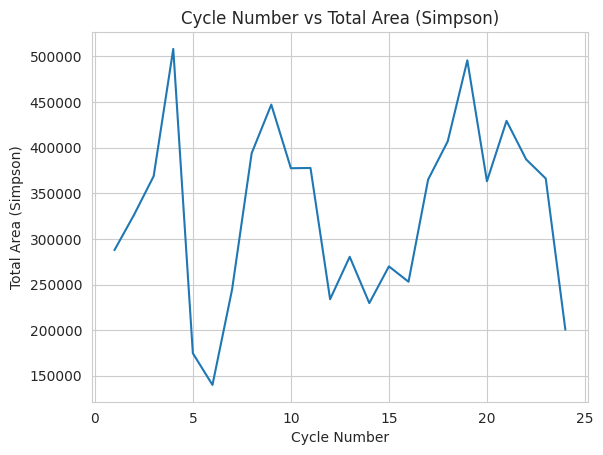

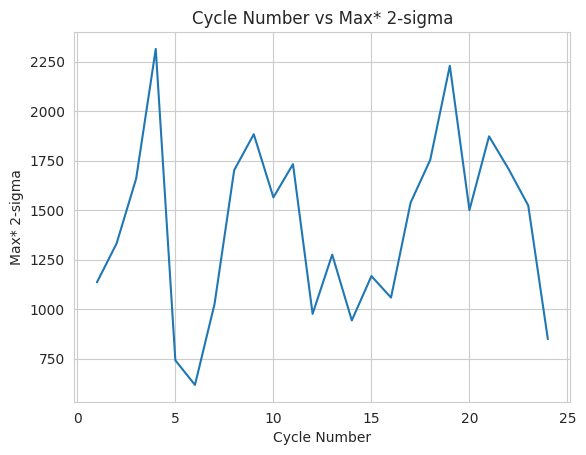

In [75]:
plt.figure()
plt.plot(df_results['Cycle Number'], df_results['Total Area (Simpson)'])
plt.xlabel("Cycle Number")
plt.ylabel("Total Area (Simpson)")
plt.title("Cycle Number vs Total Area (Simpson)")
plt.show()

plt.figure()
plt.plot(df_results['Cycle Number'], df_results['Max* 2-sigma'])
plt.xlabel("Cycle Number")
plt.ylabel("Max* 2-sigma")
plt.title("Cycle Number vs Max* 2-sigma")
plt.show()


In [76]:
df_results.to_csv('fit_results.csv', index='False')


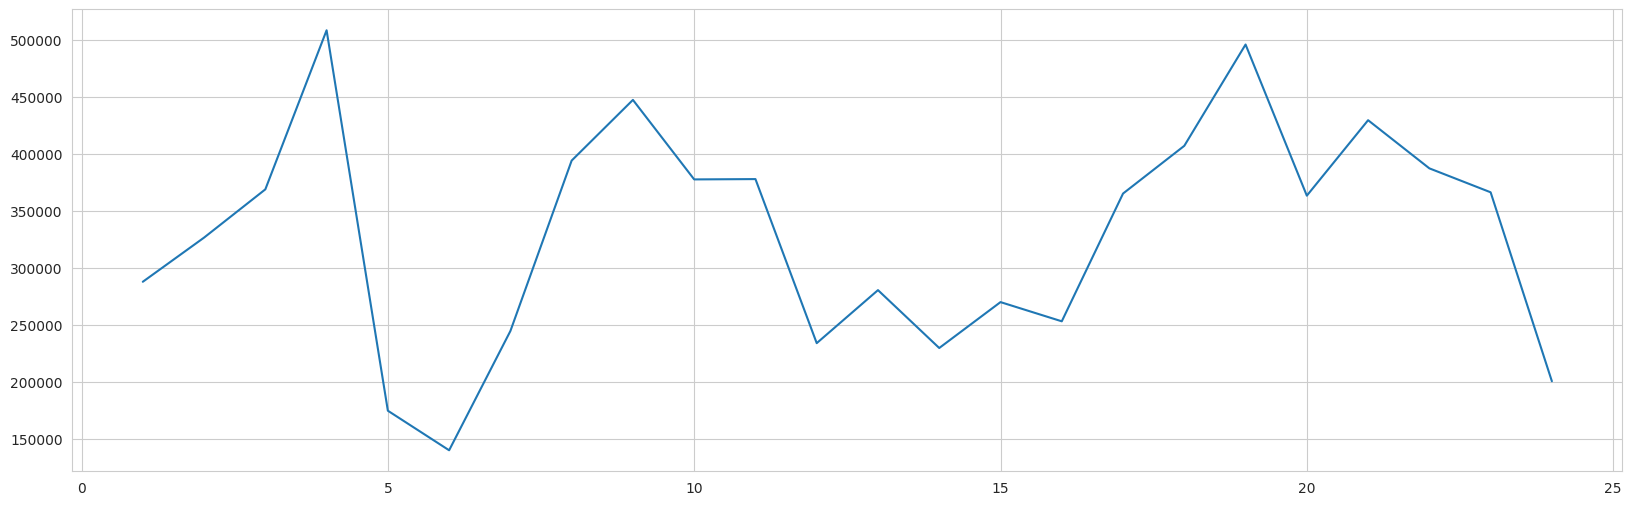

In [77]:
plt.figure(figsize=(20,6))
# plt.scatter(df_results['Skewness (Data)'], df_results['Mean Sunspot Number '])
# plt.plot(df_results['Cycle Number'], df_results['Skewness (Data)'])
plt.plot(df_results['Cycle Number'], df_results['Total Area (Simpson)'])
plt.show()

In [78]:
df_cycles = df_results.drop_duplicates(subset='Cycle Number')
df_odd = df_cycles[df_cycles['Cycle Number'] % 2 == 1]
df_even = df_cycles[df_cycles['Cycle Number'] % 2 == 0]

df_odd = df_odd.reset_index(drop=True)
df_even = df_even.reset_index(drop=True)

In [79]:
df_even

,Cycle Number,Skewness (Data),Excess Kurtosis (Data),Total Area (Simpson),1σ Width (years),2σ Width (years),Mean Sunspot Number,Skew fitted maximum,Max* 2-sigma
0,2,0.547792,-0.370726,326435.552841,4.077098,7.492679,98.232110,177.58,1330.56
1,4,0.485517,-0.893247,508191.588165,5.545162,10.384108,102.656707,222.84,2313.96
2,6,1.242990,1.864050,139979.103038,4.230021,8.303234,30.525325,74.27,616.71
3,8,0.564341,-0.482985,393951.241938,4.038102,7.407534,111.432479,229.68,1701.40
4,10,0.261535,-0.993755,377447.386096,4.889599,8.739864,91.615441,178.93,1563.85
5,12,0.458262,-0.976245,233892.931926,4.371057,8.386670,56.431618,116.32,975.54
6,14,0.622021,-0.194994,229639.307687,4.631147,8.780553,53.502878,107.33,942.46
7,16,0.343506,-1.083218,253039.205891,4.243707,8.089975,67.744262,130.76,1057.82
8,18,0.320942,-1.104893,406902.898181,4.177371,7.915660,108.033333,221.51,1753.38
9,20,0.139655,-1.252244,363195.012583,5.182520,9.390178,86.472464,159.75,1500.12


In [80]:
kurt1=kurtosis(df_even['Excess Kurtosis (Data)'])
kurt1

np.float64(4.19571897840235)

slope is given as: 2.145229462604443
Intercept -1.7895760838108359
R value 0.8482898599309012
p value 0.000487786514544149
Standard error 0.423469194059078


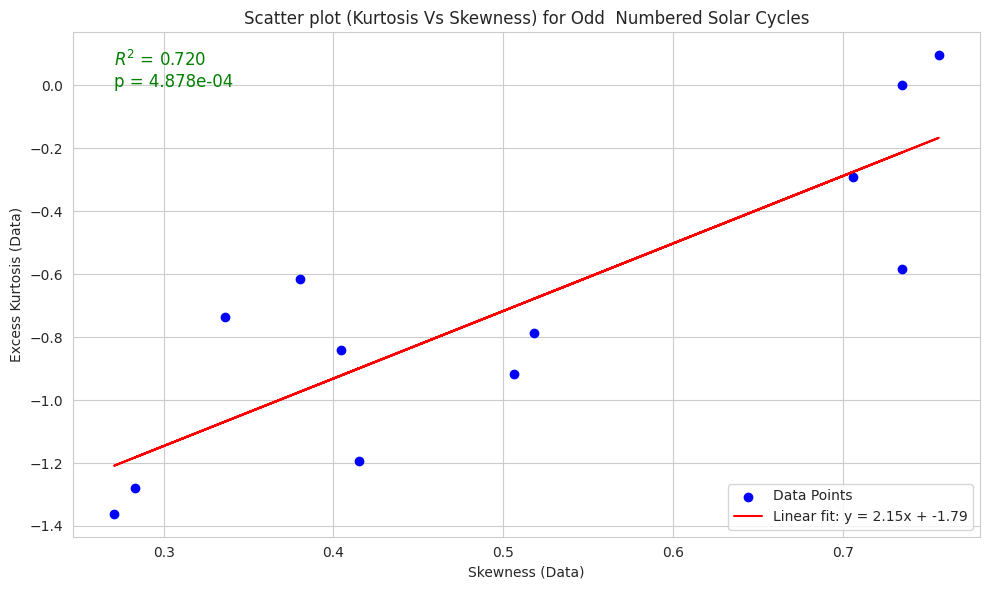

In [81]:
from scipy import stats
x = df_odd['Skewness (Data)']
y = df_odd['Excess Kurtosis (Data)']
slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)
line = slope * x + intercept
print("slope is given as:",slope)
print("Intercept", intercept)
print("R value",r_value)
print("p value", p_value)
print("Standard error", std_err)

# Plot scatter and line
plt.figure(figsize=(10,6))
plt.scatter(x, y, color='blue', label='Data Points')
plt.plot(x, line, color='red', label=f'Linear fit: y = {slope:.2f}x + {intercept:.2f}')
plt.xlabel('Skewness (Data)')
plt.ylabel('Excess Kurtosis (Data)')
plt.title('Scatter plot (Kurtosis Vs Skewness) for Odd  Numbered Solar Cycles')
# plt.grid(True)
plt.legend()
r_squared = r_value**2
plt.text(min(x), max(y)-0.1, f'$R^2$ = {r_squared:.3f}\np = {p_value:.3e}', fontsize=12, color='green')
plt.tight_layout()
plt.savefig('Kurtosis Vs Skewness_odd_cycle.png')
plt.show()


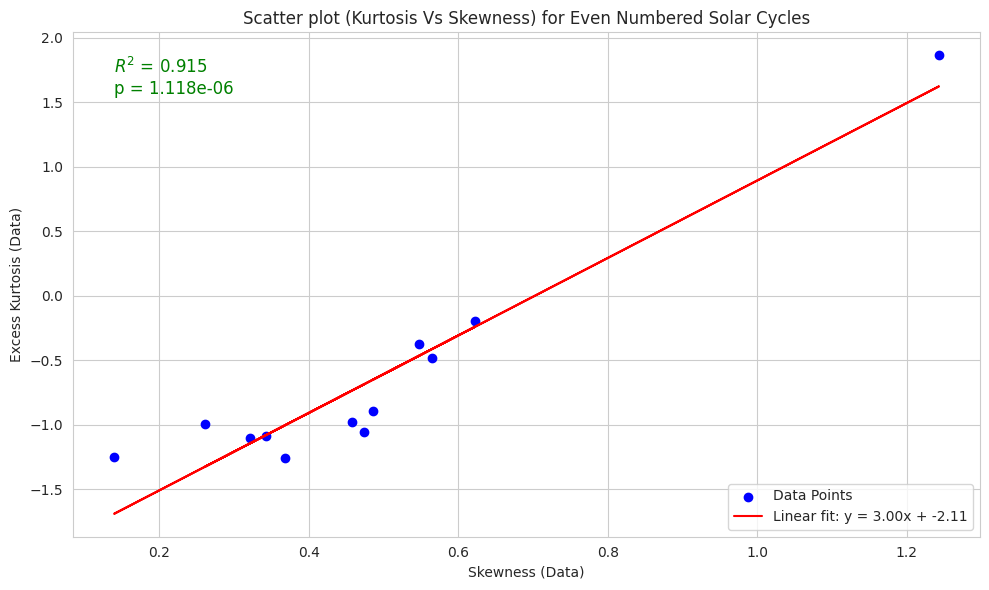

In [82]:
x = df_even['Skewness (Data)']
y = df_even['Excess Kurtosis (Data)']
slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)
line = slope * x + intercept

# Plot scatter and line
plt.figure(figsize=(10,6))
plt.scatter(x, y, color='blue', label='Data Points')
plt.plot(x, line, color='red', label=f'Linear fit: y = {slope:.2f}x + {intercept:.2f}')
plt.xlabel('Skewness (Data)')
plt.ylabel('Excess Kurtosis (Data)')
plt.title('Scatter plot (Kurtosis Vs Skewness) for Even Numbered Solar Cycles')
# plt.grid(True)
plt.legend()
r_squared = r_value**2
plt.text(min(x), max(y)-0.3, f'$R^2$ = {r_squared:.3f}\np = {p_value:.3e}', fontsize=12, color='green')
plt.tight_layout()
plt.savefig('Kurtosis Vs Skewness For Even Cycles.png')
plt.show()


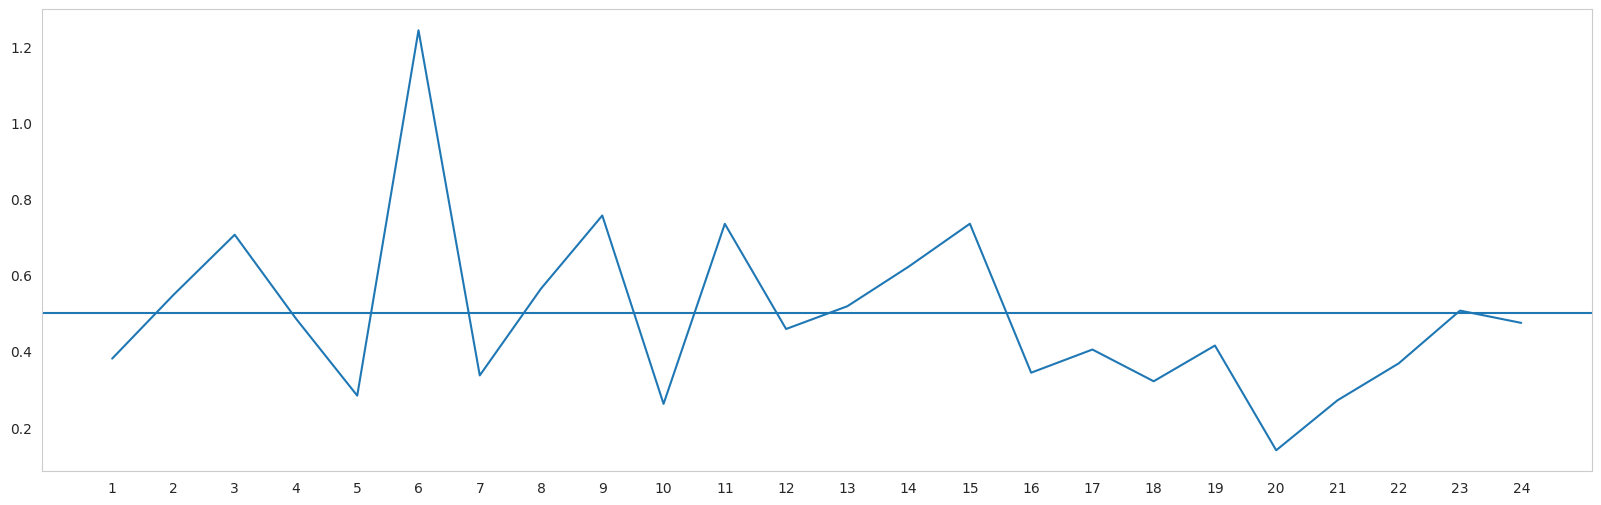

In [83]:
plt.figure(figsize=(20,6))
plt.plot(df_results['Cycle Number'], df_results['Skewness (Data)'], label='Kurtosis (Data)')
plt.axhline(y=0.5)
plt.xticks(df_results['Cycle Number'].unique())
plt.grid()
plt.show()

In [84]:
# import numpy as np
# import matplotlib.pyplot as plt
# from scipy.interpolate import make_interp_spline  # For smoothing

# # First plot: Kurtosis vs Cycle Number (Smoothed)

# # Interpolation for smooth curve
# x_kurtosis = df_results['Cycle Number']
# y_kurtosis = df_results['Excess Kurtosis (Data)']

# # Create new interpolated points
# xnew = np.linspace(x_kurtosis.min(), x_kurtosis.max(), 300)  # 300 points between min and max
# spl = make_interp_spline(x_kurtosis, y_kurtosis, k=3)  # B-spline with degree=3
# y_smooth = spl(xnew)

# plt.figure(figsize=(20,6))
# plt.plot(xnew, y_smooth, label='Smoothed Kurtosis (Data)', color='purple')
# plt.scatter(x_kurtosis, y_kurtosis, color='black', label='Original Points', s=30)  # optional scatter to show real points
# plt.title('Excess Kurtosis over Solar Cycles', fontsize=18)
# plt.xlabel('Cycle Number', fontsize=14)
# plt.ylabel('Excess Kurtosis', fontsize=14)
# plt.legend()
# plt.grid()
# plt.show()

# # Second plot: Sunspot Data vs Date
# start_date='1755-02-01'
# end_date='2025-02-01'
# filtered_df = df[(df['date'] >= start_date) & (df['date'] <= end_date)]
# filtered_df
# plt.figure(figsize=(20,6))
# plt.plot(filtered_df['date'], filtered_df['SN'], label='Sunspot Number', color='orange')
# plt.title('Monthly Mean Sunspot Numbers', fontsize=18)
# plt.xlabel('Date', fontsize=14)
# plt.ylabel('Sunspot Number', fontsize=14)
# plt.legend()
# plt.grid()
# plt.show()


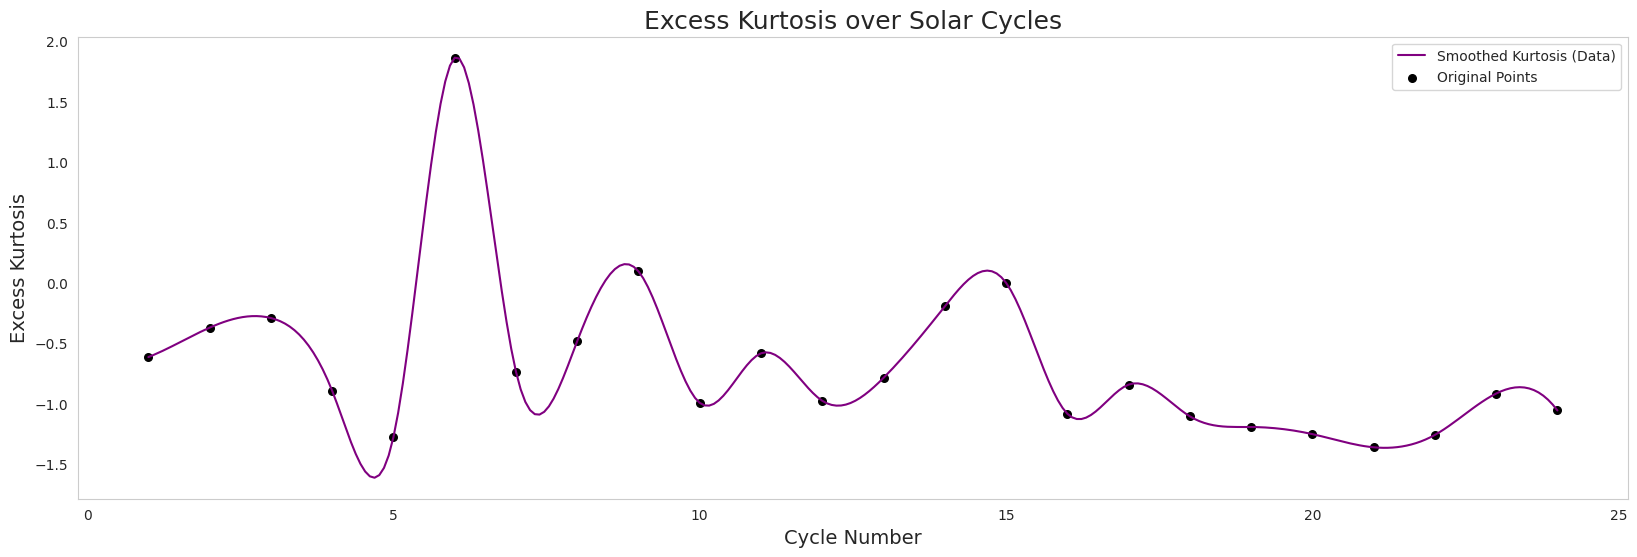

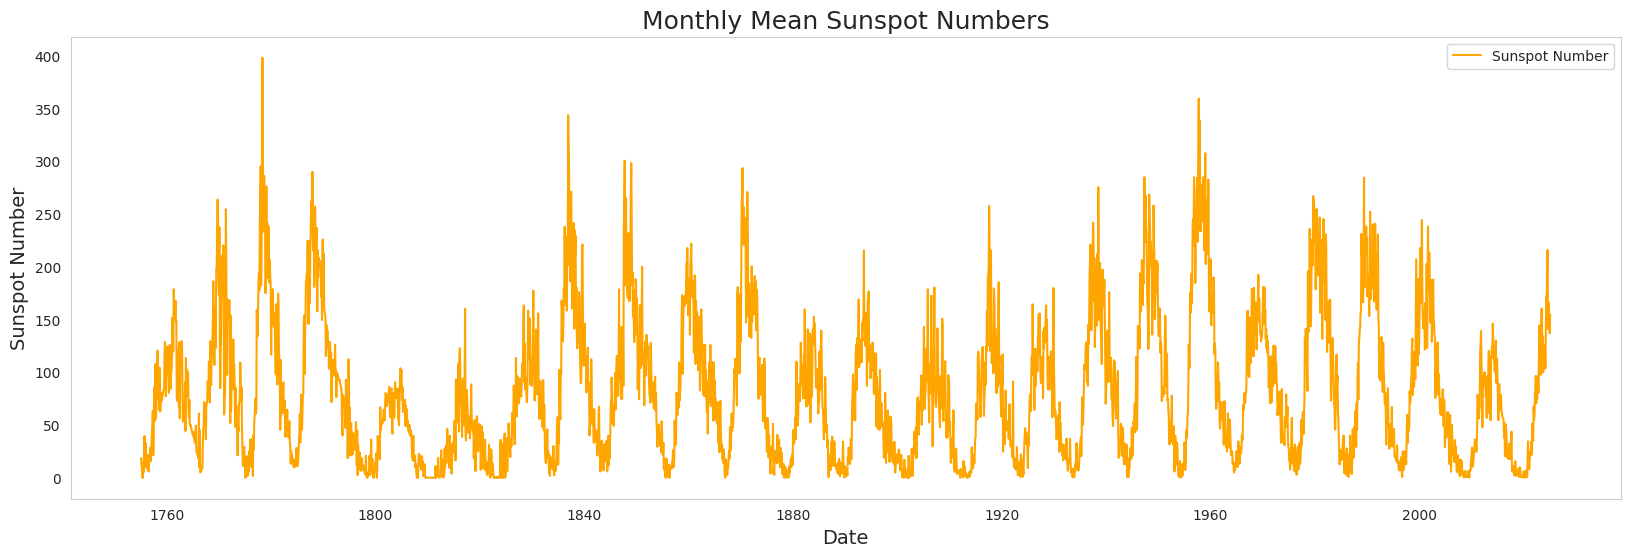

In [85]:
# Group by Cycle Number and take mean (if duplicates exist)
kurtosis_grouped = df_results.groupby('Cycle Number')['Excess Kurtosis (Data)'].mean().reset_index()

x_kurtosis = kurtosis_grouped['Cycle Number']
y_kurtosis = kurtosis_grouped['Excess Kurtosis (Data)']

# Now safe to interpolate
from scipy.interpolate import make_interp_spline
xnew = np.linspace(x_kurtosis.min(), x_kurtosis.max(), 300)
spl = make_interp_spline(x_kurtosis, y_kurtosis, k=3)
y_smooth = spl(xnew)

# Plotting
plt.figure(figsize=(20,6))
plt.plot(xnew, y_smooth, label='Smoothed Kurtosis (Data)', color='purple')
plt.scatter(x_kurtosis, y_kurtosis, color='black', label='Original Points', s=30)
plt.title('Excess Kurtosis over Solar Cycles', fontsize=18)
plt.xlabel('Cycle Number', fontsize=14)
plt.ylabel('Excess Kurtosis', fontsize=14)
plt.legend()
plt.grid()
plt.show()


start_date='1755-02-01'
end_date='2025-02-01'
filtered_df = df[(df['date'] >= start_date) & (df['date'] <= end_date)]
filtered_df
plt.figure(figsize=(20,6))
plt.plot(filtered_df['date'], filtered_df['SN'], label='Sunspot Number', color='orange')
plt.title('Monthly Mean Sunspot Numbers', fontsize=18)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Sunspot Number', fontsize=14)
plt.legend()
plt.grid()
plt.show()


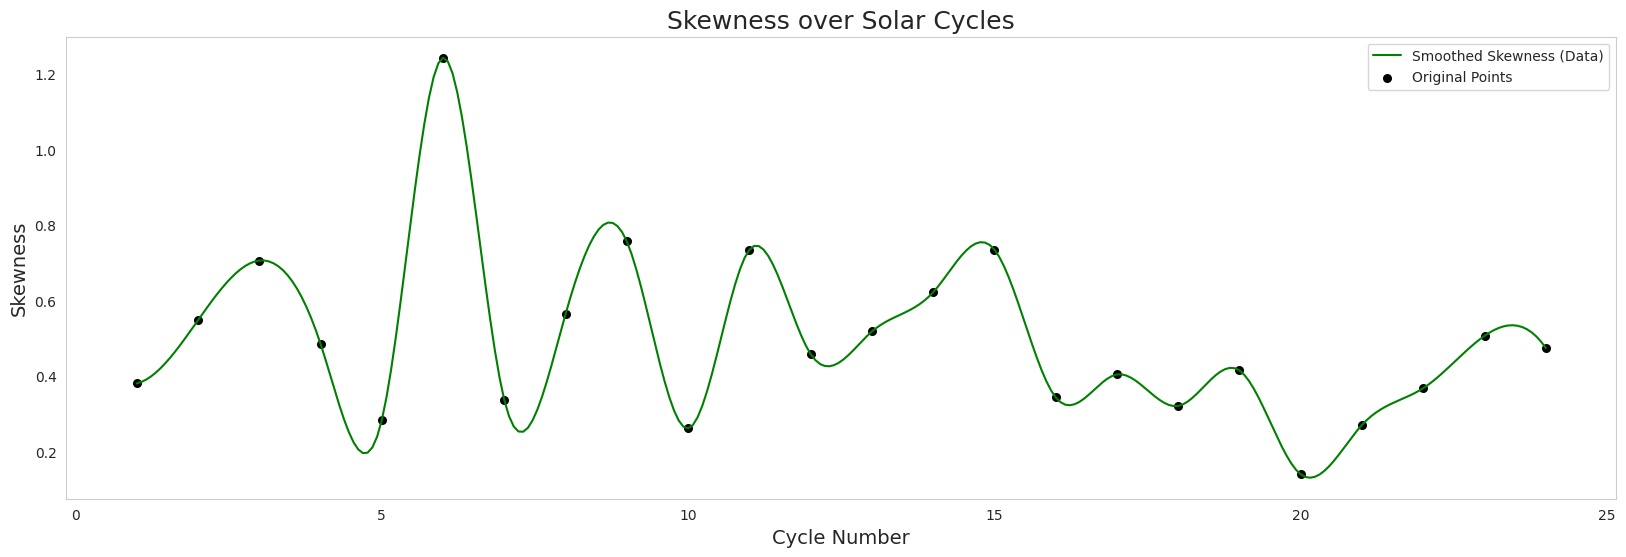

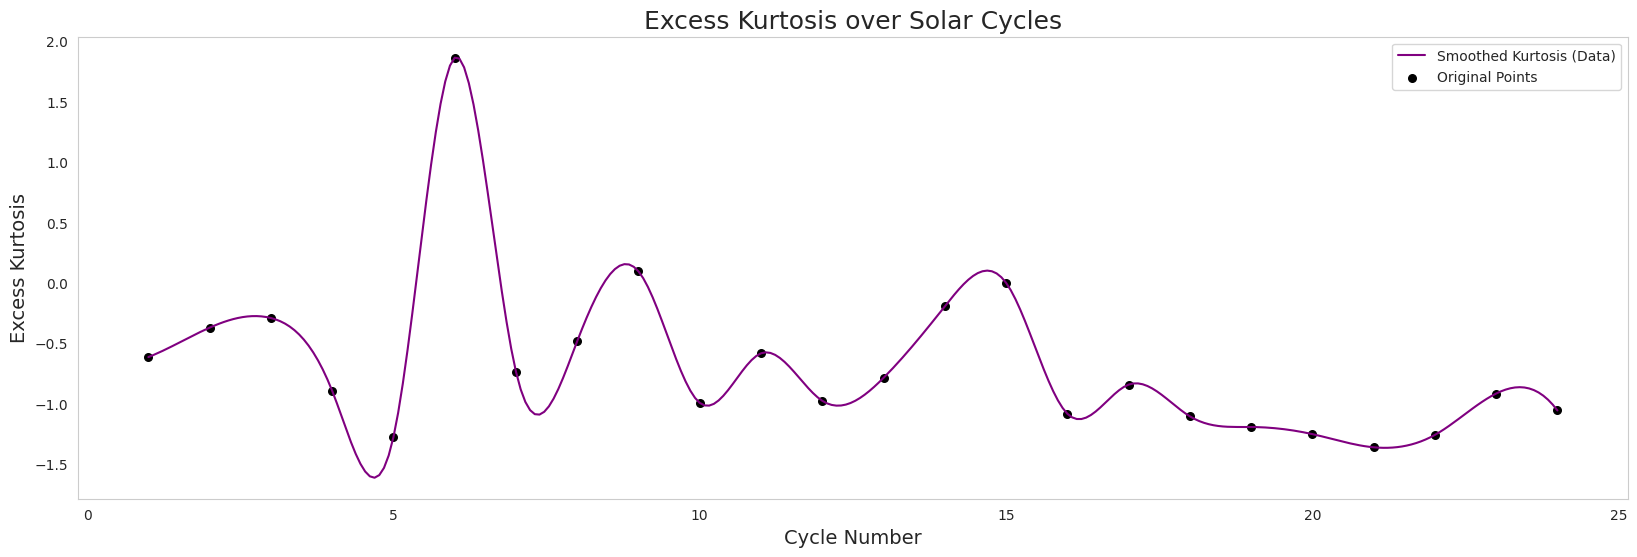

In [86]:
from scipy.interpolate import make_interp_spline

skewness_grouped = df_results.groupby('Cycle Number')['Skewness (Data)'].mean().reset_index()
x_skewness = skewness_grouped['Cycle Number']
y_skewness = skewness_grouped['Skewness (Data)']

xnew_skew = np.linspace(x_skewness.min(), x_skewness.max(), 300)
spl_skew = make_interp_spline(x_skewness, y_skewness, k=3)
y_smooth_skew = spl_skew(xnew_skew)

# Plotting
plt.figure(figsize=(20,6))
plt.plot(xnew_skew, y_smooth_skew, label='Smoothed Skewness (Data)', color='green')
plt.scatter(x_skewness, y_skewness, color='black', label='Original Points', s=30)
plt.title('Skewness over Solar Cycles', fontsize=18)
plt.xlabel('Cycle Number', fontsize=14)
plt.ylabel('Skewness', fontsize=14)
plt.legend()
plt.grid()
plt.show()

kurtosis_grouped = df_results.groupby('Cycle Number')['Excess Kurtosis (Data)'].mean().reset_index()

x_kurtosis = kurtosis_grouped['Cycle Number']
y_kurtosis = kurtosis_grouped['Excess Kurtosis (Data)']

# Now safe to interpolate
from scipy.interpolate import make_interp_spline
xnew = np.linspace(x_kurtosis.min(), x_kurtosis.max(), 300)
spl = make_interp_spline(x_kurtosis, y_kurtosis, k=3)
y_smooth = spl(xnew)

# Plotting
plt.figure(figsize=(20,6))
plt.plot(xnew, y_smooth, label='Smoothed Kurtosis (Data)', color='purple')
plt.scatter(x_kurtosis, y_kurtosis, color='black', label='Original Points', s=30)
plt.title('Excess Kurtosis over Solar Cycles', fontsize=18)
plt.xlabel('Cycle Number', fontsize=14)
plt.ylabel('Excess Kurtosis', fontsize=14)
plt.legend()
plt.grid()
plt.show()

